In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tqdm import *
import os
from datasets import load_dataset
from utils_1 import read_txn_data, preprocess_txn_data, compute_lob_features, create_lob_dataset, merge_txn_and_lob

c:\Users\peter\anaconda3\envs\torch_gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
freq='5min'
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df,freq, fill_missing_ts=False)
df = merge_txn_and_lob(trx_df, lob_df,freq)

trx Data loaded successfully.
preprocessed lob Data loaded successfully.


In [5]:
df

,datetime,buy_volume,sell_volume,buy_txn,sell_txn,volume_imbalance,txn_imbalance,total_volume,mean_volume,deseasoned_total_volume,...,ask_slope_5,ask_slope_10,bid_slope_1,bid_slope_5,bid_slope_10,spread,lob_volume_imbalance,slope_imbalance_1,slope_imbalance_5,slope_imbalance_10
1163,2018-06-04 22:00:05+00:00,4.110453,4.175295,95.0,30.0,0.064842,65.0,8.285749,29.244585,0.283326,...,2695.804973,2695.804973,3.972121,53.502450,160.246934,6.19,583660.308720,1757.658546,2642.302523,2535.558040
1164,2018-06-04 22:05:05+00:00,0.579045,3.373552,15.0,17.0,2.794507,2.0,3.952597,22.893149,0.172654,...,2646.609837,2646.609837,2.240304,42.838426,160.030834,4.33,583661.392527,1711.511509,2603.771411,2486.579003
1165,2018-06-04 22:10:05+00:00,0.935114,7.605058,49.0,29.0,6.669943,20.0,8.540172,28.912804,0.295377,...,2692.780308,2692.780308,3.398417,122.784273,230.739393,4.72,583655.379845,1699.678930,2569.996035,2462.040915
1166,2018-06-04 22:15:05+00:00,2.138732,2.397898,61.0,28.0,0.259166,33.0,4.536630,23.005778,0.197195,...,2684.584582,2684.584582,47.170901,194.070903,258.553253,1.26,583691.569579,1626.190532,2490.513679,2426.031329
1167,2018-06-04 22:20:05+00:00,11.773303,5.162054,94.0,16.0,6.611249,78.0,16.935358,24.074095,0.703468,...,2691.271950,2691.271950,40.175665,134.230252,283.772371,0.39,583700.897483,1619.139947,2557.041699,2407.499579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34962,2018-09-30 21:40:05+00:00,16.933169,0.217044,41.0,2.0,16.716125,39.0,17.150213,34.548421,0.496411,...,2884.331180,2884.331180,92.618876,144.092581,241.693608,6.79,499192.148616,1694.435811,2740.238599,2642.637572
34963,2018-09-30 21:45:05+00:00,2.693770,0.969224,14.0,5.0,1.724547,9.0,3.662994,24.414627,0.150033,...,2884.686299,2884.686299,93.478131,144.295761,207.556483,5.89,499195.196647,1693.960199,2740.390538,2677.129816
34964,2018-09-30 21:50:05+00:00,1.377229,0.974653,15.0,8.0,0.402576,7.0,2.351881,29.509068,0.079700,...,2856.043529,2856.043529,84.135558,130.467587,195.550423,5.58,499172.120858,1682.518944,2725.575942,2660.493106
34965,2018-09-30 21:55:05+00:00,5.615628,2.031659,17.0,11.0,3.583969,6.0,7.647286,24.549364,0.311506,...,2804.837578,2804.837578,95.243968,145.303291,235.965279,3.86,499262.351042,1612.335641,2659.534287,2568.872299


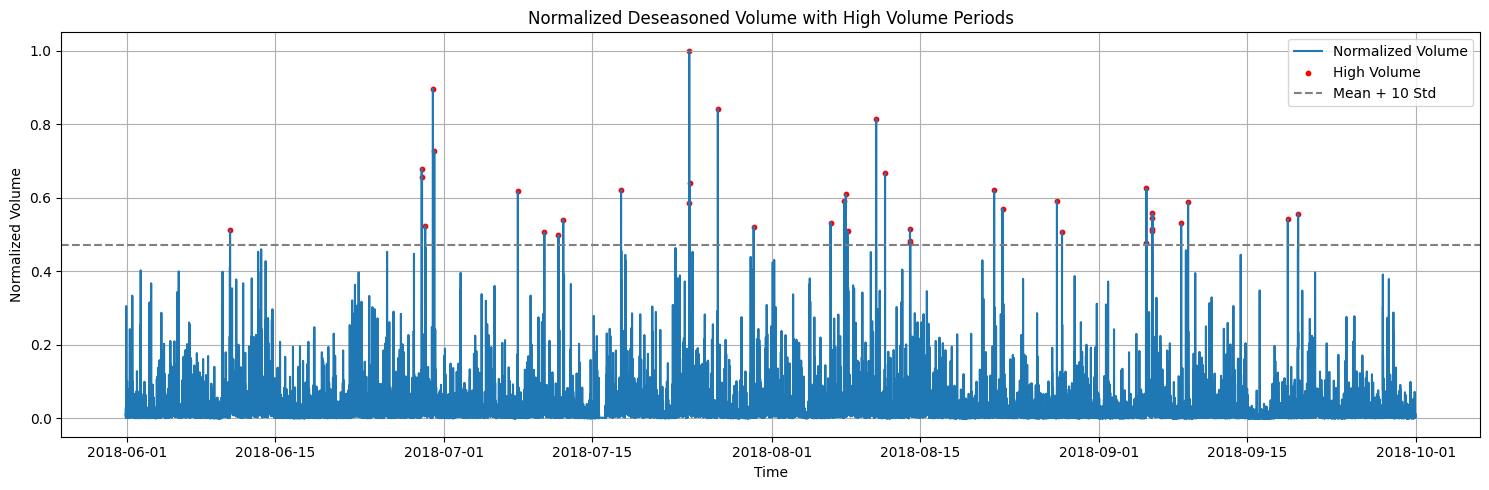

Mean: 0.02493371930162707, Std: 0.04463242418772831, Threshold: 0.47125796117891017
1.0


C:\Users\peter\AppData\Local\Temp\ipykernel_10020\713617860.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_volume['gap'] = (high_volume['datetime'].diff() != pd.Timedelta(minutes=1)).cumsum()


In [6]:
trx_df['normalized_volume'] = trx_df['deseasoned_total_volume'] / trx_df['deseasoned_total_volume'].max()

# Compute threshold
mean_volume = trx_df['normalized_volume'].mean()
std_volume = trx_df['normalized_volume'].std()
threshold = mean_volume + 10*std_volume
# Identify high volume periods
high_volume = trx_df[trx_df['normalized_volume'] > threshold]

# Plot
plt.figure(figsize=(15, 5))
plt.plot(trx_df['datetime'], trx_df['normalized_volume'], label='Normalized Volume')
plt.scatter(high_volume['datetime'], high_volume['normalized_volume'], color='red', label='High Volume', s=10)
plt.axhline(y=threshold, color='gray', linestyle='--', label='Mean + 10 Std')
plt.title('Normalized Deseasoned Volume with High Volume Periods')
plt.xlabel('Time')
plt.ylabel('Normalized Volume')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
print(f"Mean: {mean_volume}, Std: {std_volume}, Threshold: {threshold}")


# Identify continuous periods
high_volume['gap'] = (high_volume['datetime'].diff() != pd.Timedelta(minutes=1)).cumsum()
period_lengths = high_volume.groupby('gap').size()
# Calculate average period length in minutes
average_length = period_lengths.mean()
print(average_length)

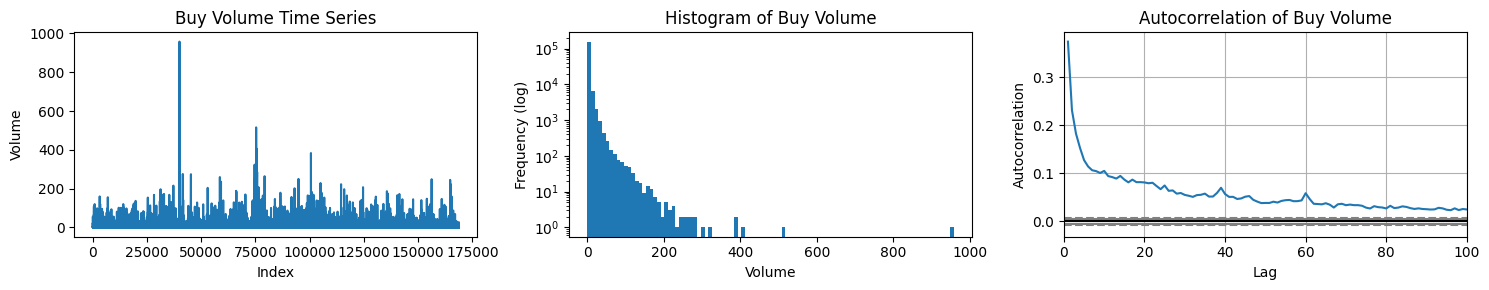

In [15]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# 1. Time series plot
trx_df["buy_volume"].plot(ax=axes[0])
axes[0].set_title("Buy Volume Time Series")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Volume")

# 2. Histogram (log y-scale to reveal tail better)
trx_df["buy_volume"].plot(kind="hist", bins=100, ax=axes[1], logy=True)
axes[1].set_title("Histogram of Buy Volume")
axes[1].set_xlabel("Volume")
axes[1].set_ylabel("Frequency (log)")

# 3. Autocorrelation function (ACF)
autocorrelation_plot(trx_df["buy_volume"], ax=axes[2])
axes[2].set_title("Autocorrelation of Buy Volume")
axes[2].set_xlim(0, 100)  # Limit lag for clarity

plt.tight_layout()
plt.show()


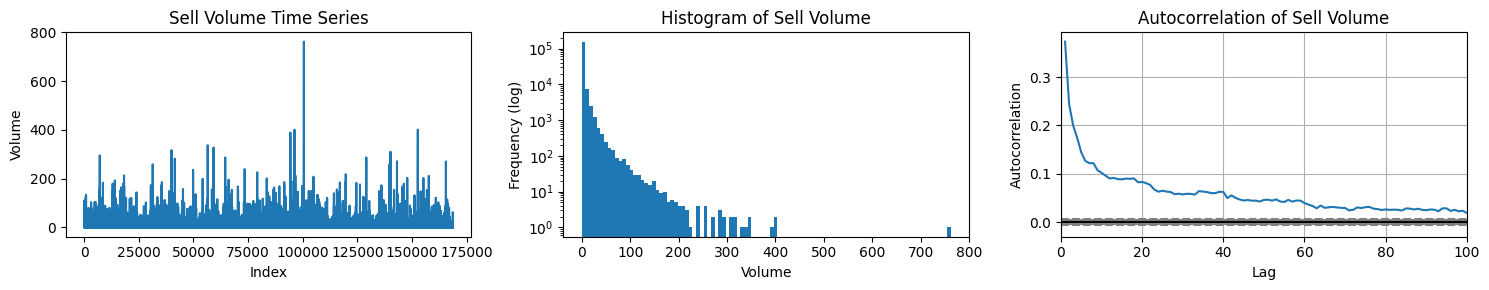

In [16]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# 1. Time series plot
trx_df["sell_volume"].plot(ax=axes[0])
axes[0].set_title("Sell Volume Time Series")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Volume")

# 2. Histogram (log y-scale to reveal tail better)
trx_df["sell_volume"].plot(kind="hist", bins=100, ax=axes[1], logy=True)
axes[1].set_title("Histogram of Sell Volume")
axes[1].set_xlabel("Volume")
axes[1].set_ylabel("Frequency (log)")

# 3. Autocorrelation function (ACF)
autocorrelation_plot(trx_df["sell_volume"], ax=axes[2])
axes[2].set_title("Autocorrelation of Sell Volume")
axes[2].set_xlim(0, 100)  # Limit lag for clarity

plt.tight_layout()
plt.show()


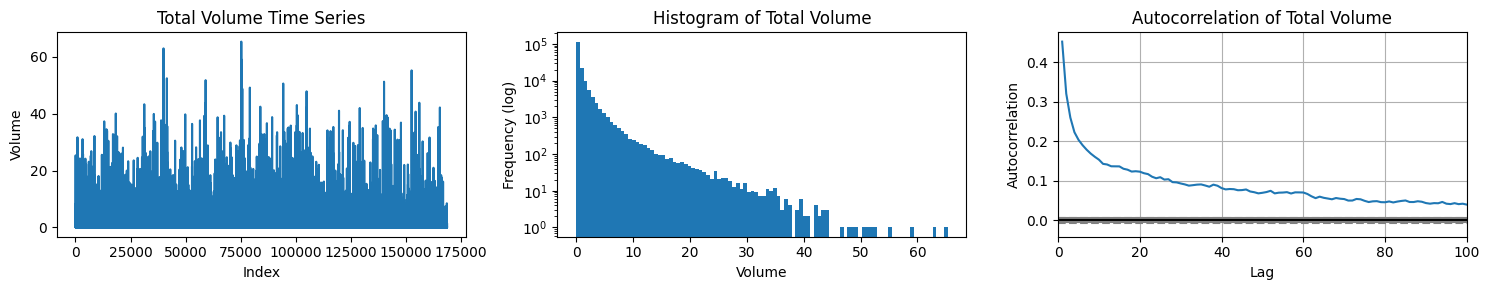

In [17]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# 1. Time series plot
trx_df["deseasoned_total_volume"].plot(ax=axes[0])
axes[0].set_title("Total Volume Time Series")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Volume")

# 2. Histogram (log y-scale to reveal tail better)
trx_df["deseasoned_total_volume"].plot(kind="hist", bins=100, ax=axes[1], logy=True)
axes[1].set_title("Histogram of Total Volume")
axes[1].set_xlabel("Volume")
axes[1].set_ylabel("Frequency (log)")

# 3. Autocorrelation function (ACF)
autocorrelation_plot(trx_df["deseasoned_total_volume"], ax=axes[2])
axes[2].set_title("Autocorrelation of Total Volume")
axes[2].set_xlim(0, 100)  # Limit lag for clarity

plt.tight_layout()
plt.show()

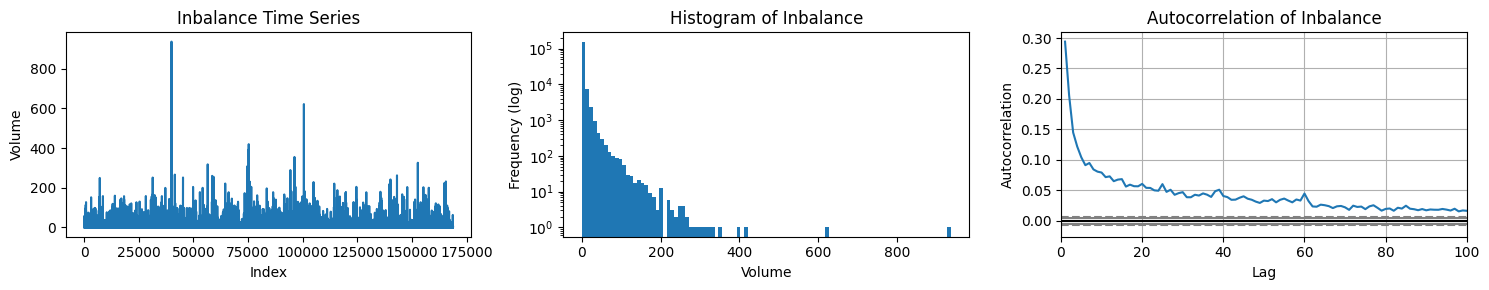

In [18]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

# 1. Time series plot
trx_df["volume_imbalance"].plot(ax=axes[0])
axes[0].set_title("Inbalance Time Series")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Volume")

# 2. Histogram (log y-scale to reveal tail better)
trx_df["volume_imbalance"].plot(kind="hist", bins=100, ax=axes[1], logy=True)
axes[1].set_title("Histogram of Inbalance")
axes[1].set_xlabel("Volume")
axes[1].set_ylabel("Frequency (log)")

# 3. Autocorrelation function (ACF)
autocorrelation_plot(trx_df["volume_imbalance"], ax=axes[2])
axes[2].set_title("Autocorrelation of Inbalance")
axes[2].set_xlim(0, 100)  # Limit lag for clarity

plt.tight_layout()
plt.show()

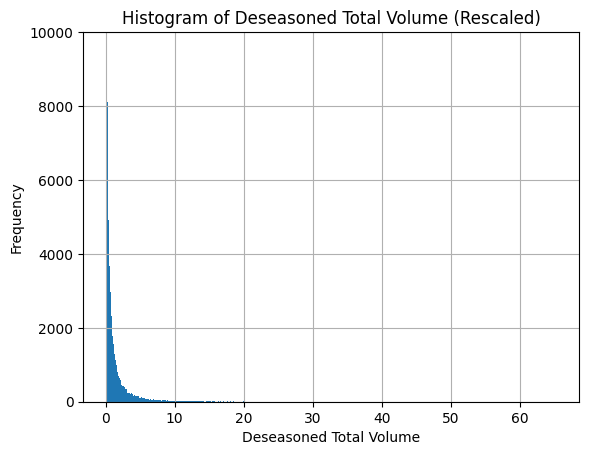

In [19]:
import matplotlib.pyplot as plt

# Create histogram and store the returned values
counts, bins, patches = plt.hist(df['deseasoned_total_volume'], bins=1000)


plt.ylim(top=10000)

plt.xlabel("Deseasoned Total Volume")
plt.ylabel("Frequency")
plt.title("Histogram of Deseasoned Total Volume (Rescaled)")
plt.grid(True)
plt.show()


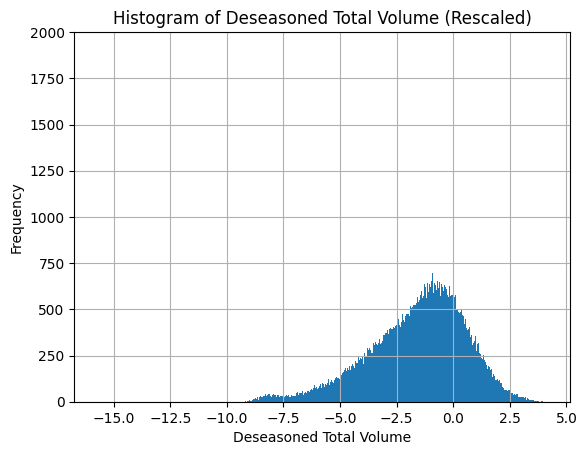

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# Create histogram and store the returned values
counts, bins, patches = plt.hist(np.log(df['deseasoned_total_volume']), bins=1000)


plt.ylim(top=2000)

plt.xlabel("Deseasoned Total Volume")
plt.ylabel("Frequency")
plt.title("Histogram of Deseasoned Total Volume (Rescaled)")
plt.grid(True)
plt.show()


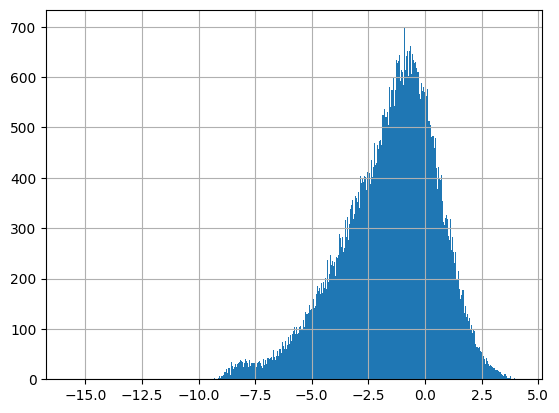

In [21]:
df['log_deseasoned_total_volume'] = np.log(df['deseasoned_total_volume'])
df['log_deseasoned_total_volume'].hist(bins=1000)
data = df[['log_deseasoned_total_volume', 'datetime']].set_index('datetime').resample('1min').mean().dropna()

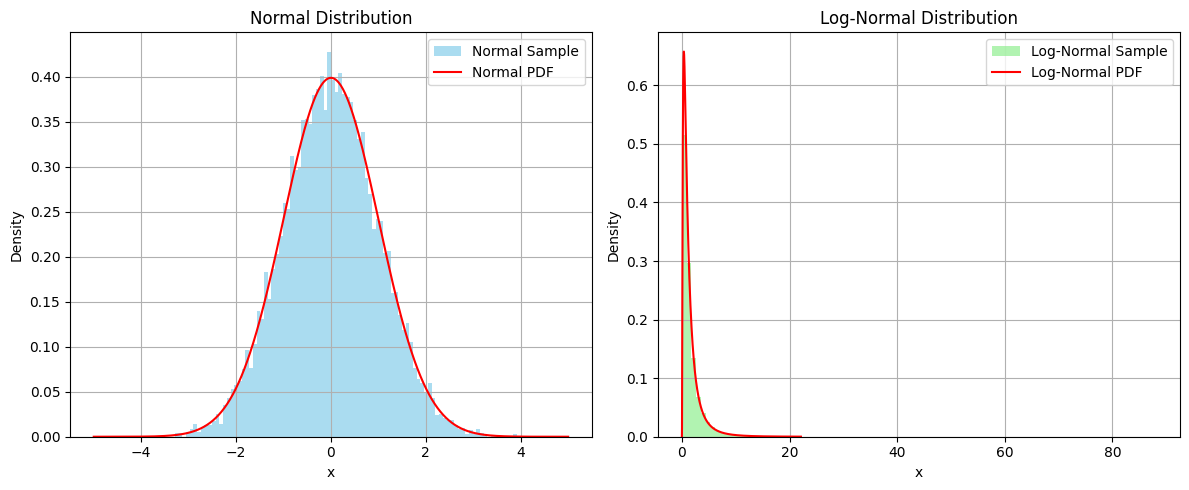

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Simulate data
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=10000)
lognormal_data = np.random.lognormal(mean=0, sigma=1, size=10000)

# Plot histograms
plt.figure(figsize=(12, 5))

# Normal distribution
plt.subplot(1, 2, 1)
plt.hist(normal_data, bins=100, density=True, alpha=0.7, color='skyblue', label="Normal Sample")
x = np.linspace(-5, 5, 1000)
plt.plot(x, norm.pdf(x, 0, 1), 'r-', label="Normal PDF")
plt.title("Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()

# Log-Normal distribution
plt.subplot(1, 2, 2)
plt.hist(lognormal_data, bins=100, density=True, alpha=0.7, color='lightgreen', label="Log-Normal Sample")
x = np.linspace(0.001, np.percentile(lognormal_data, 99.9), 1000)
plt.plot(x, lognorm.pdf(x, s=1, scale=np.exp(0)), 'r-', label="Log-Normal PDF")
plt.title("Log-Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Could not fit Log-Normal: Invalid values in `data`.  Maximum likelihood estimation with 'lognorm' requires that 0.0 < (x - loc)/scale  < inf for each x in `data`.


C:\Users\peter\AppData\Local\Temp\ipykernel_12044\2657399771.py:57: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(pdf_vals))
C:\Users\peter\AppData\Local\Temp\ipykernel_12044\2657399771.py:57: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(pdf_vals))
C:\Users\peter\AppData\Local\Temp\ipykernel_12044\2657399771.py:48: RuntimeWarning: invalid value encountered in power
  1 - (xm / x)**alpha)


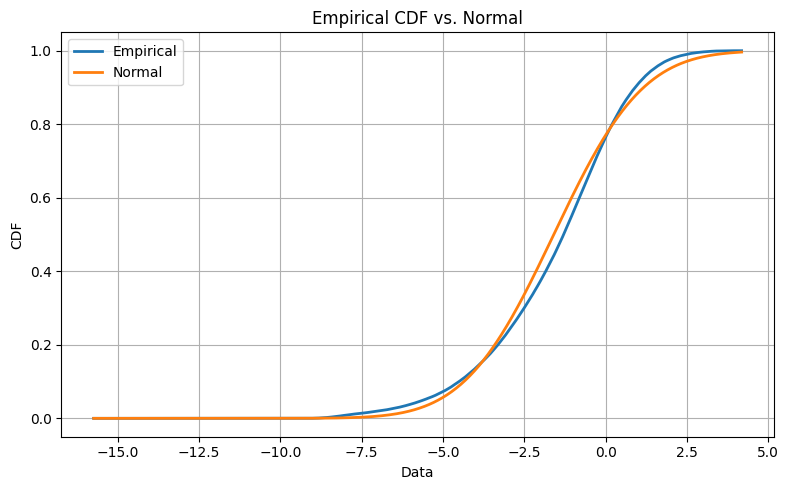

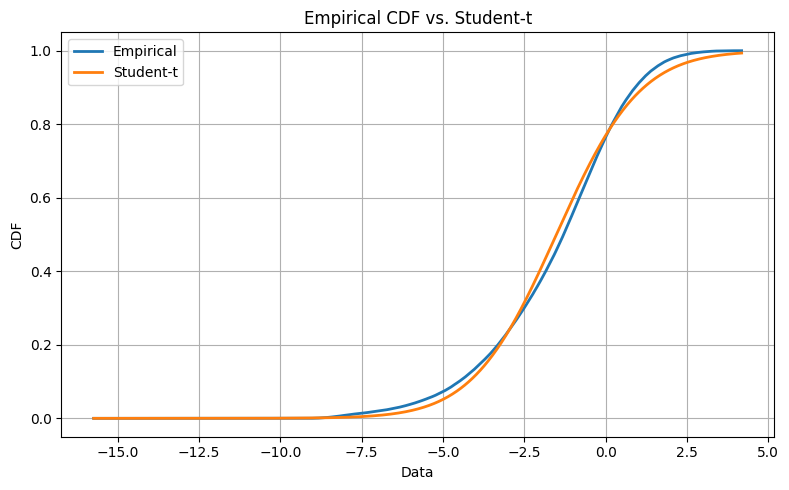

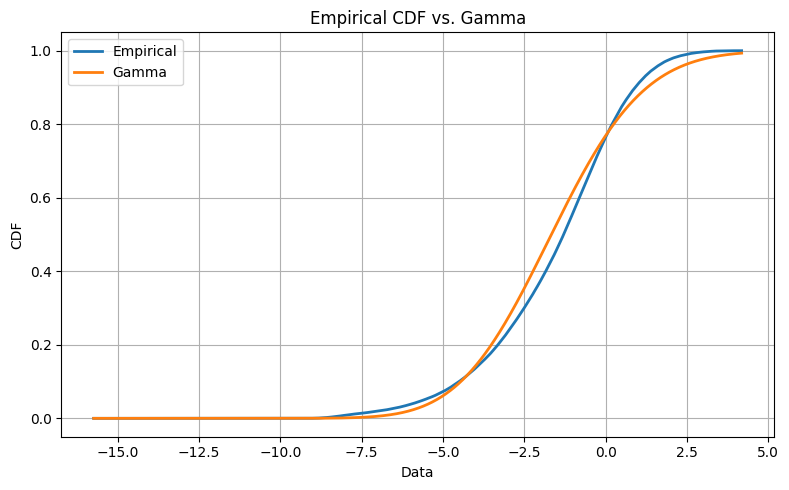

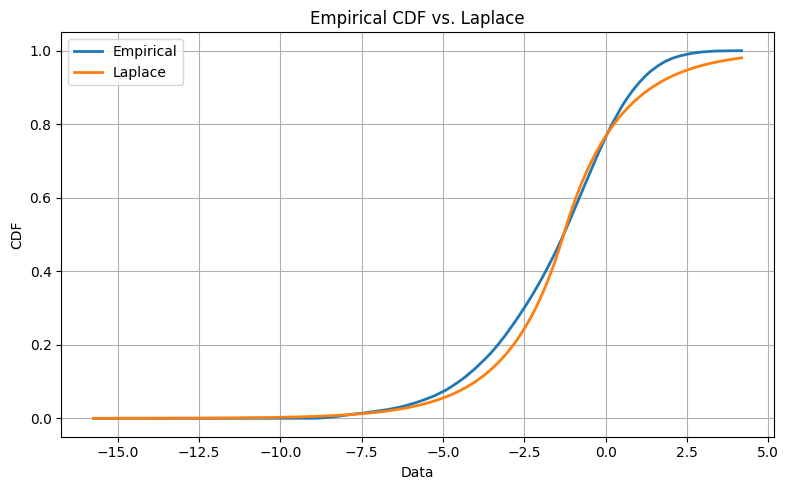

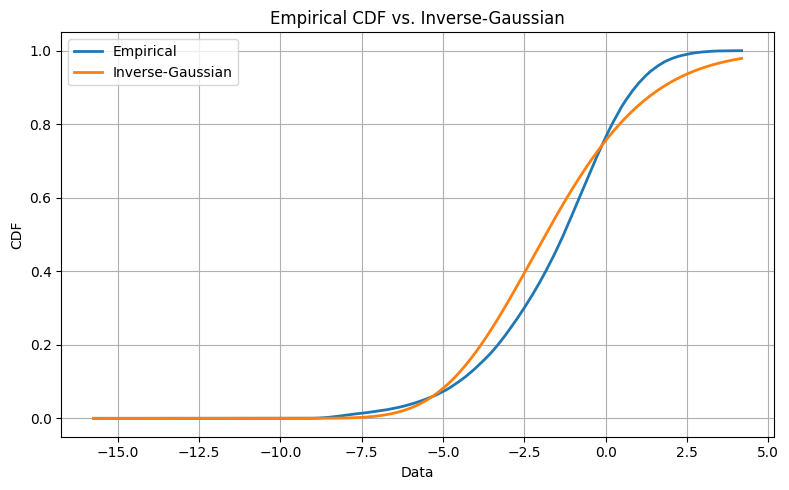

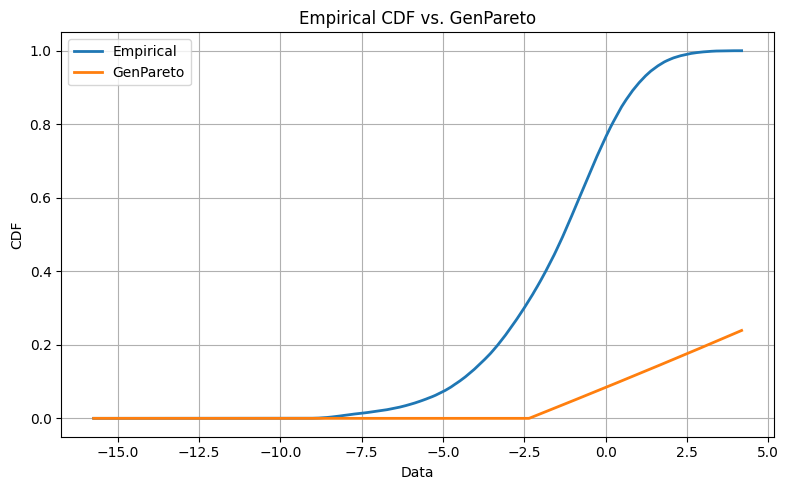

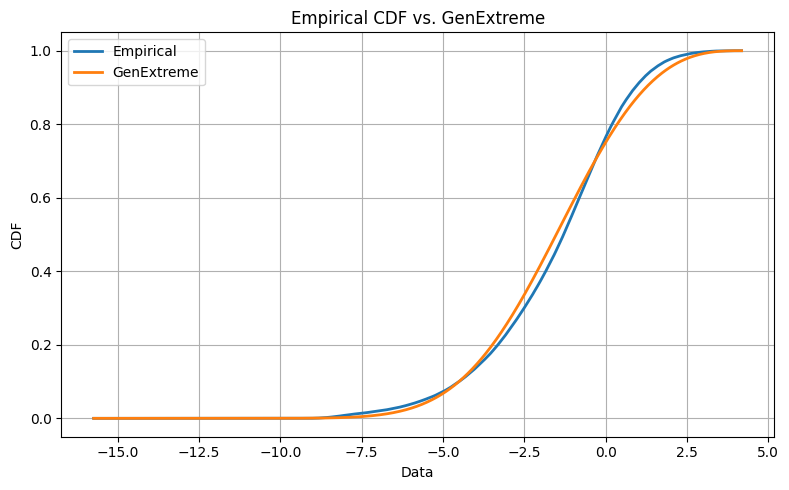

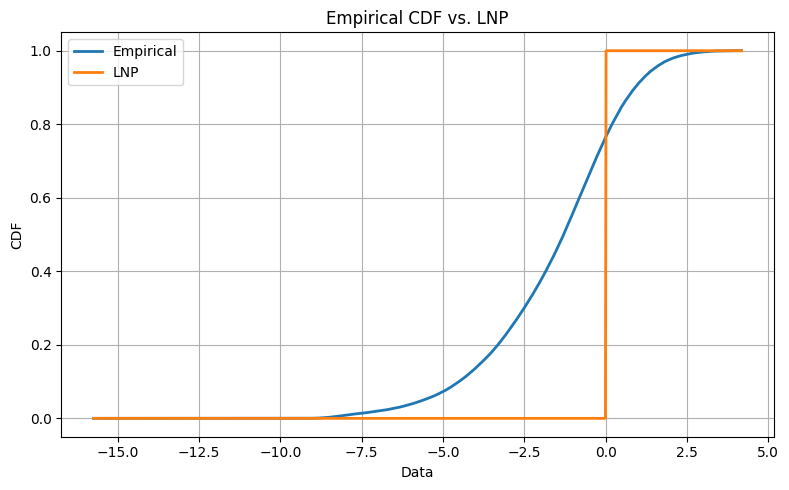


Kolmogorov-Smirnov Statistics:
Normal         : 0.057680
Student-t      : 0.043911
Gamma          : 0.070850
Laplace        : 0.057485
Inverse-Gaussian: 0.100948
GenPareto      : 0.820158
GenExtreme     : 0.044613
LNP            : 0.763265

Best fitting model: Student-t (KS = 0.043911)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, genpareto, invgauss, gamma, t, norm, laplace, genextreme
from scipy.optimize import minimize
from statsmodels.distributions.empirical_distribution import ECDF

# Convert to numpy array
data = data.values.flatten()

# ECDF
ecdf = ECDF(data)
x = np.linspace(np.min(data), np.max(data), 1000)
ecdf_y = ecdf(x)

# Fit standard distributions
fitted = {}

# Distributions to fit from scipy.stats
distribution_defs = {
    "Normal": norm,
    "Student-t": t,
    "Log-Normal": lognorm,
    "Gamma": gamma,
    "Laplace": laplace,
    "Inverse-Gaussian": invgauss,
    "GenPareto": genpareto,
    "GenExtreme": genextreme
}

for name, dist in distribution_defs.items():
    try:
        if name == "Log-Normal":
            params = dist.fit(data, floc=0)
        elif name == "GenPareto":
            shifted_data = data - np.min(data)
            params = dist.fit(shifted_data)
        else:
            params = dist.fit(data)
        cdf_vals = dist.cdf(x, *params)
        fitted[name] = {"dist": dist, "params": params, "cdf": cdf_vals}
    except Exception as e:
        print(f"Could not fit {name}: {e}")

# --- Custom Log-Normal–Pareto Composite (LNP) ---
def lnp_cdf(x, mu, sigma, xm, alpha):
    return np.where(x <= xm,
                    lognorm.cdf(x, sigma, scale=np.exp(mu)),
                    1 - (xm / x)**alpha)

def lnp_neg_loglik(params):
    mu, sigma, xm, alpha = params
    if sigma <= 0 or alpha <= 0 or xm <= 0:
        return np.inf
    cdf_vals = lnp_cdf(data, mu, sigma, xm, alpha)
    cdf_vals = np.clip(cdf_vals, 1e-10, 1-1e-10)
    pdf_vals = np.gradient(cdf_vals, edge_order=2)
    return -np.sum(np.log(pdf_vals))

init_params = [np.mean(data), np.std(data), np.percentile(data, 70), 2.0]
bounds = [(None, None), (1e-6, None), (1e-6, None), (1e-6, None)]
res = minimize(lnp_neg_loglik, init_params, bounds=bounds)
mu_lnp, sigma_lnp, xm_lnp, alpha_lnp = res.x
cdf_lnp = lnp_cdf(x, mu_lnp, sigma_lnp, xm_lnp, alpha_lnp)
fitted["LNP"] = {"dist": "Custom", "params": (mu_lnp, sigma_lnp, xm_lnp, alpha_lnp), "cdf": cdf_lnp}

# --- Plot ECDF vs Model for Each Distribution ---
for name, result in fitted.items():
    plt.figure(figsize=(8, 5))
    plt.plot(x, ecdf_y, label="Empirical", lw=2)
    plt.plot(x, result["cdf"], label=name, lw=2)
    plt.title(f"Empirical CDF vs. {name}")
    plt.xlabel("Data")
    plt.ylabel("CDF")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Compute KS Statistic ---
print("\nKolmogorov-Smirnov Statistics:")
ks_stats = {}
for name, result in fitted.items():
    ks_stat = np.max(np.abs(ecdf_y - result["cdf"]))
    ks_stats[name] = ks_stat
    print(f"{name:15}: {ks_stat:.6f}")

# Best model
best = min(ks_stats.items(), key=lambda x: x[1])
print(f"\nBest fitting model: {best[0]} (KS = {best[1]:.6f})")


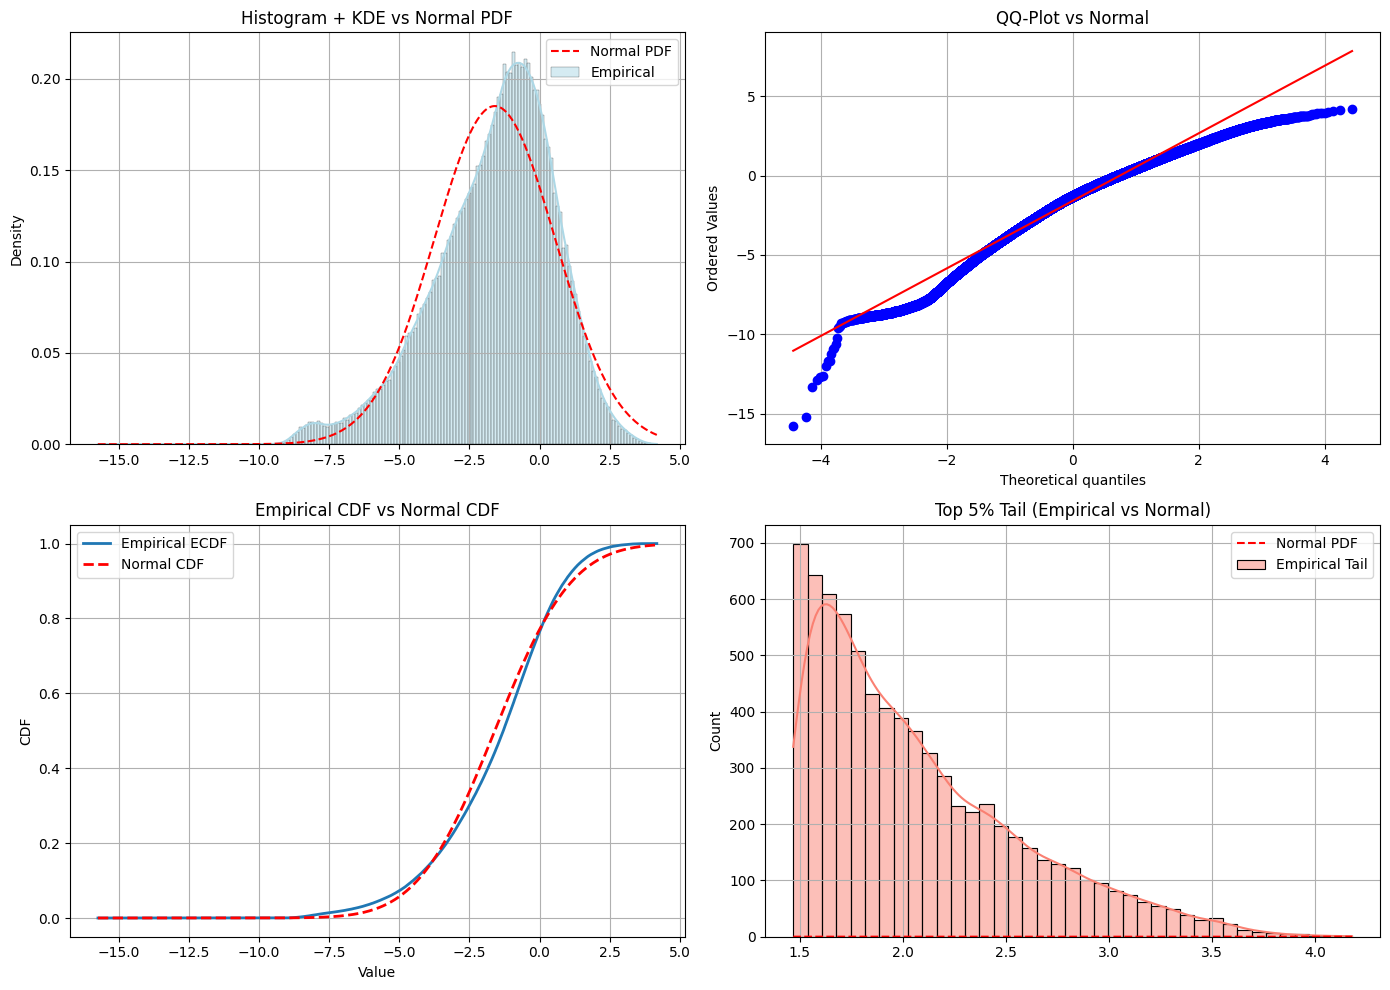

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Ensure `data` is a 1D NumPy array
# data = df["log_deseasoned_total_volume"].values.flatten()

# Fit normal distribution
mu, std = norm.fit(data)

# ECDF data
sorted_data = np.sort(data)
ecdf_y = np.linspace(0, 1, len(data))

# Plot
plt.figure(figsize=(14, 10))

# 1. Histogram + KDE
plt.subplot(2, 2, 1)
sns.histplot(data, kde=True, stat="density", color='lightblue', label="Empirical")
x_vals = np.linspace(min(data), max(data), 1000)
plt.plot(x_vals, norm.pdf(x_vals, mu, std), 'r--', label="Normal PDF")
plt.title("Histogram + KDE vs Normal PDF")
plt.legend()
plt.grid(True)

# 2. QQ-Plot vs Normal
plt.subplot(2, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ-Plot vs Normal")
plt.grid(True)

# 3. ECDF vs Normal CDF
plt.subplot(2, 2, 3)
plt.plot(sorted_data, ecdf_y, label="Empirical ECDF", lw=2)
plt.plot(sorted_data, norm.cdf(sorted_data, mu, std), 'r--', label="Normal CDF", lw=2)
plt.title("Empirical CDF vs Normal CDF")
plt.xlabel("Value")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)

# 4. Top 5% Tail
plt.subplot(2, 2, 4)
tail = data[data > np.percentile(data, 95)]
sns.histplot(tail, kde=True, color='salmon', label="Empirical Tail")
x_tail = np.linspace(min(tail), max(tail), 500)
plt.plot(x_tail, norm.pdf(x_tail, mu, std), 'r--', label="Normal PDF")
plt.title("Top 5% Tail (Empirical vs Normal)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


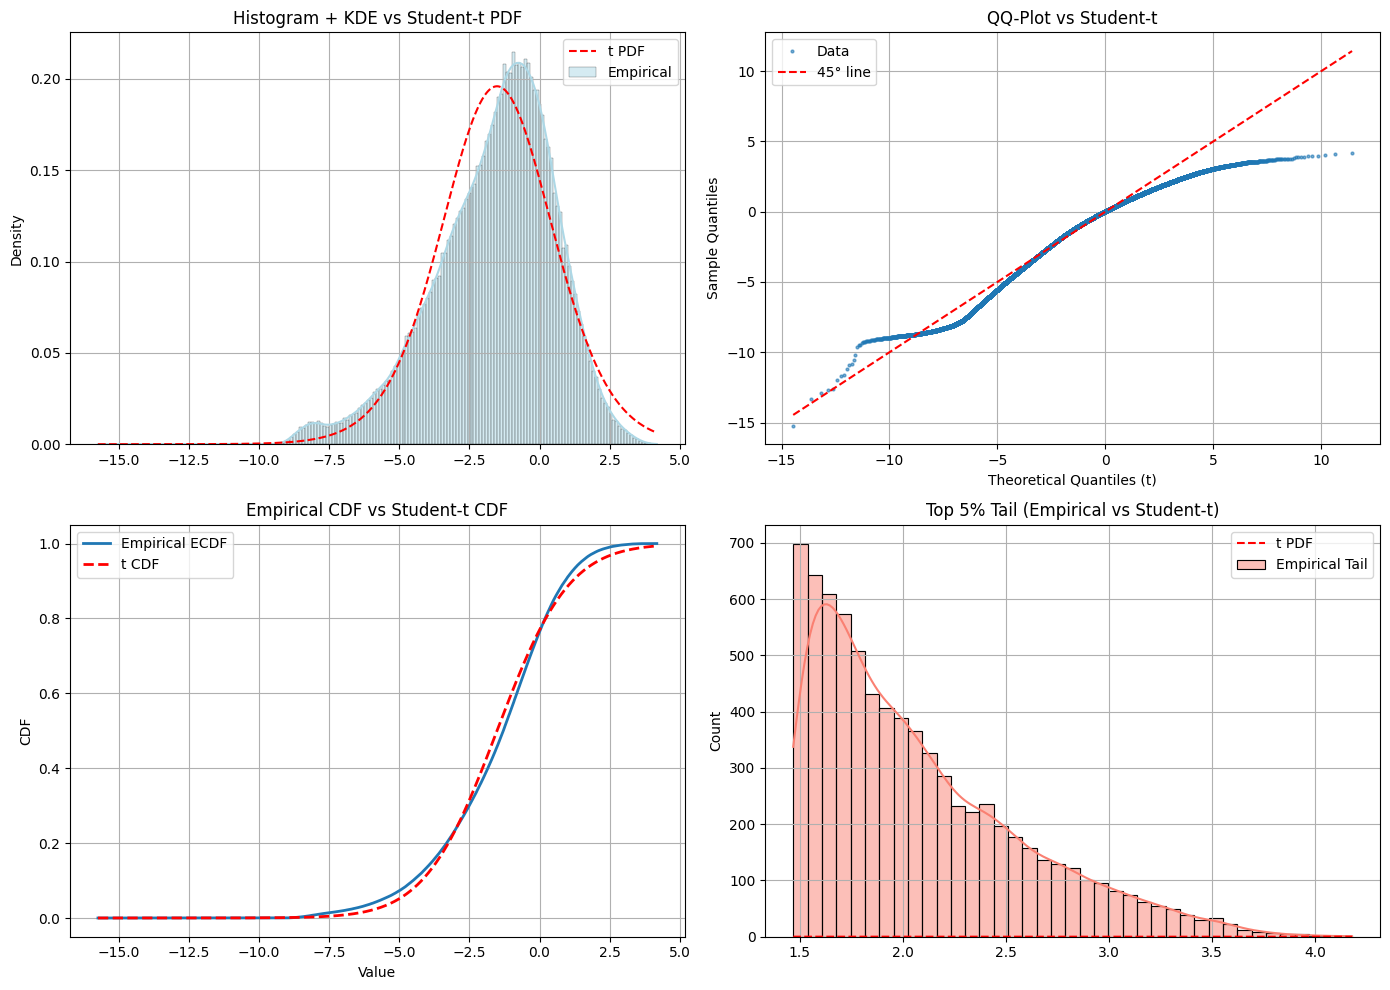

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t

# Ensure `data` is a 1D NumPy array
# Example: data = df["log_deseasoned_total_volume"].values.flatten()

# Fit t-distribution to the data
df_t, loc_t, scale_t = t.fit(data)

# ECDF data
sorted_data = np.sort(data)
ecdf_y = np.linspace(0, 1, len(data))

# Plot
plt.figure(figsize=(14, 10))

# 1. Histogram + KDE vs Student-t PDF
plt.subplot(2, 2, 1)
sns.histplot(data, kde=True, stat="density", color='lightblue', label="Empirical")
x_vals = np.linspace(min(data), max(data), 1000)
plt.plot(x_vals, t.pdf(x_vals, df_t, loc=loc_t, scale=scale_t), 'r--', label="t PDF")
plt.title("Histogram + KDE vs Student-t PDF")
plt.legend()
plt.grid(True)

# 2. QQ-Plot vs Student-t
plt.subplot(2, 2, 2)
theoretical_quantiles = t.ppf(ecdf_y, df=df_t, loc=loc_t, scale=scale_t)
plt.plot(theoretical_quantiles, sorted_data, 'o', markersize=2, alpha=0.6, label="Data")
plt.plot(theoretical_quantiles, theoretical_quantiles, 'r--', label="45° line")
plt.xlabel("Theoretical Quantiles (t)")
plt.ylabel("Sample Quantiles")
plt.title("QQ-Plot vs Student-t")
plt.grid(True)
plt.legend()

# 3. ECDF vs Student-t CDF
plt.subplot(2, 2, 3)
plt.plot(sorted_data, ecdf_y, label="Empirical ECDF", lw=2)
plt.plot(sorted_data, t.cdf(sorted_data, df_t, loc=loc_t, scale=scale_t), 'r--', label="t CDF", lw=2)
plt.title("Empirical CDF vs Student-t CDF")
plt.xlabel("Value")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)

# 4. Top 5% Tail
plt.subplot(2, 2, 4)
tail = data[data > np.percentile(data, 95)]
sns.histplot(tail, kde=True, color='salmon', label="Empirical Tail")
x_tail = np.linspace(min(tail), max(tail), 500)
plt.plot(x_tail, t.pdf(x_tail, df_t, loc=loc_t, scale=scale_t), 'r--', label="t PDF")
plt.title("Top 5% Tail (Empirical vs Student-t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


This uses the Azzalini skewed t formulation:

$$
f(x ; \xi, \omega, \alpha, \nu)=\frac{2}{\omega} t_\nu\left(\frac{x-\xi}{\omega}\right) T_{\nu+1}\left(\alpha \cdot \frac{x-\xi}{\omega} \cdot \sqrt{\frac{\nu+1}{\nu+\left(\frac{x-\xi}{\omega}\right)^2}}\right)
$$


Where:
- $t_\nu$ : standard t PDF
- $T_{\nu+1}$ : CDF of t-distribution
- $\xi$ : location
- $\omega>0$ : scale
- $\alpha$ : skewness
- $\nu>0$ : degrees of freedom

In [26]:
import numpy as np
from scipy.stats import t
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Skewed t PDF
def skewed_t_pdf(x, xi, omega, alpha, nu):
    z = (x - xi) / omega
    t_pdf = t.pdf(z, df=nu)
    t_cdf = t.cdf(alpha * z * np.sqrt((nu + 1) / (nu + z**2)), df=nu + 1)
    return 2 / omega * t_pdf * t_cdf

# Negative log-likelihood for skewed t
def nll_skewed_t(params, data):
    xi, omega, alpha, nu = params
    if omega <= 0 or nu <= 0:
        return np.inf
    pdf_vals = skewed_t_pdf(data, xi, omega, alpha, nu)
    if np.any(pdf_vals <= 0):
        return np.inf
    return -np.sum(np.log(pdf_vals))

# Initial guesses
xi0 = np.mean(data)
omega0 = np.std(data)
alpha0 = 0  # no skew
nu0 = 5     # degrees of freedom

# Fit
result = minimize(nll_skewed_t, x0=[xi0, omega0, alpha0, nu0], args=(data,),
                  bounds=[(None, None), (1e-3, None), (None, None), (1e-3, None)])

xi_hat, omega_hat, alpha_hat, nu_hat = result.x
print(f"Fitted skewed-t parameters:\n  xi={xi_hat:.4f}, omega={omega_hat:.4f}, alpha={alpha_hat:.4f}, nu={nu_hat:.4f}")


Fitted skewed-t parameters:
  xi=0.8209, omega=3.2043, alpha=-2.7286, nu=99.5852


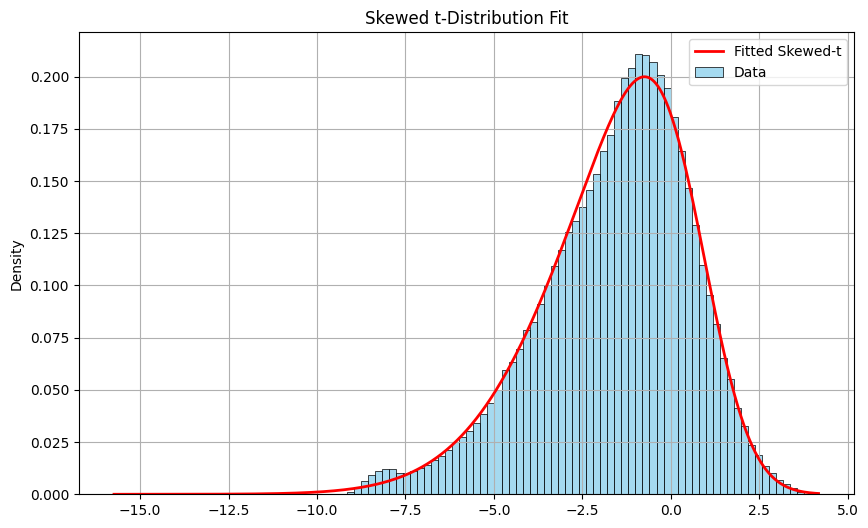

In [27]:
x_vals = np.linspace(np.min(data), np.max(data), 1000)
pdf_vals = skewed_t_pdf(x_vals, xi_hat, omega_hat, alpha_hat, nu_hat)

plt.figure(figsize=(10, 6))
sns.histplot(data, stat="density", bins=100, color="skyblue", label="Data")
plt.plot(x_vals, pdf_vals, 'r-', lw=2, label="Fitted Skewed-t")
plt.legend()
plt.title("Skewed t-Distribution Fit")
plt.grid(True)
plt.show()


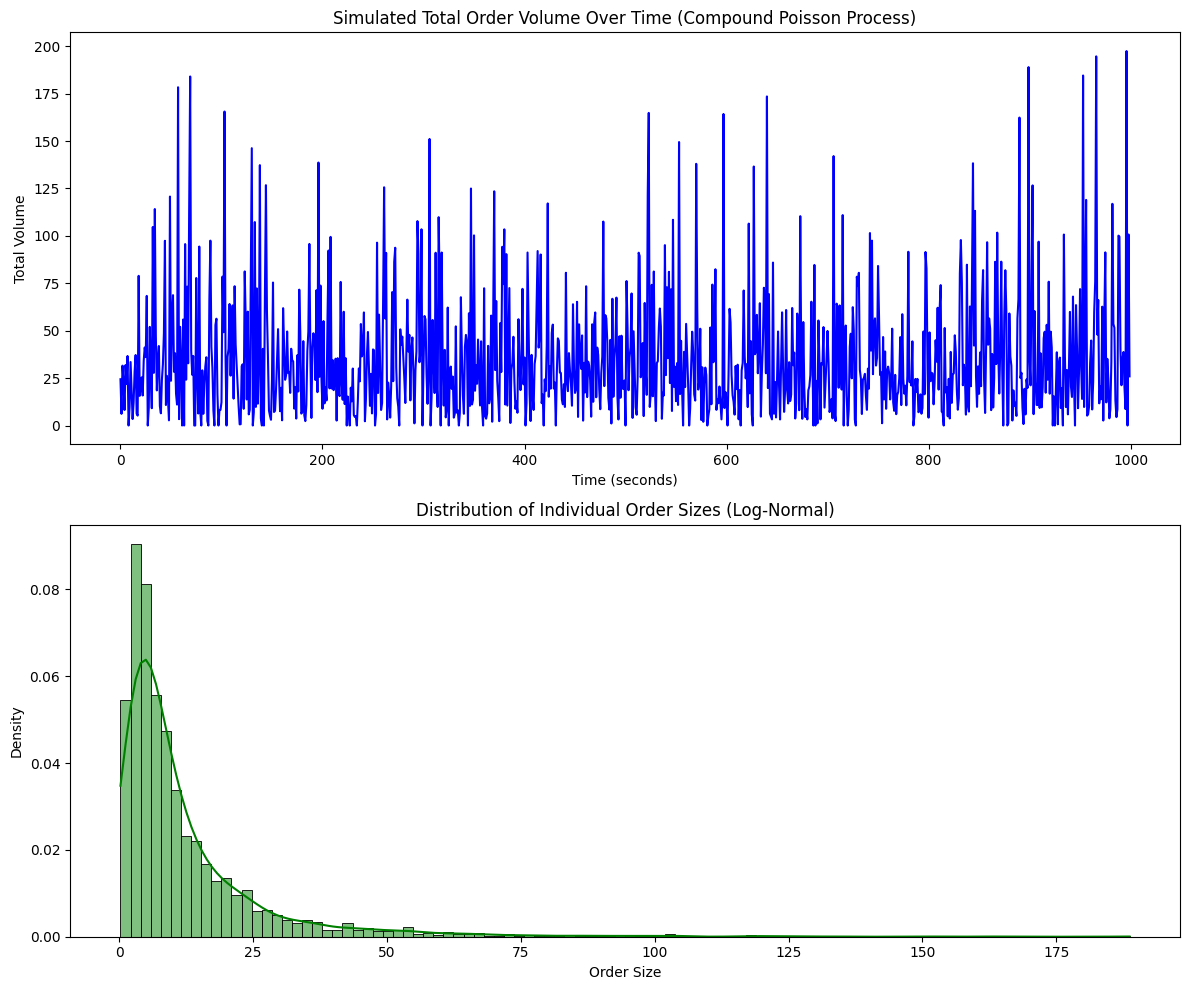

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
time_steps = 1000  # e.g., seconds
lambda_poisson = 3  # average number of orders per second
lognorm_mean = 2
lognorm_sigma = 1

# Simulate order arrivals per second
arrivals = np.random.poisson(lam=lambda_poisson, size=time_steps)

# Simulate order sizes using log-normal distribution
order_sizes = [np.random.lognormal(mean=lognorm_mean, sigma=lognorm_sigma, size=n) for n in arrivals]

# Total volume per second
total_volume = np.array([np.sum(sizes) for sizes in order_sizes])

# Flatten all order sizes for distribution plotting
all_order_sizes = np.concatenate(order_sizes)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot volume over time
axs[0].plot(total_volume, color='blue', linewidth=1.5)
axs[0].set_title("Simulated Total Order Volume Over Time (Compound Poisson Process)")
axs[0].set_xlabel("Time (seconds)")
axs[0].set_ylabel("Total Volume")

# Plot histogram of all order sizes
sns.histplot(all_order_sizes, bins=100, kde=True, stat="density", ax=axs[1], color='green')
axs[1].set_title("Distribution of Individual Order Sizes (Log-Normal)")
axs[1].set_xlabel("Order Size")
axs[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


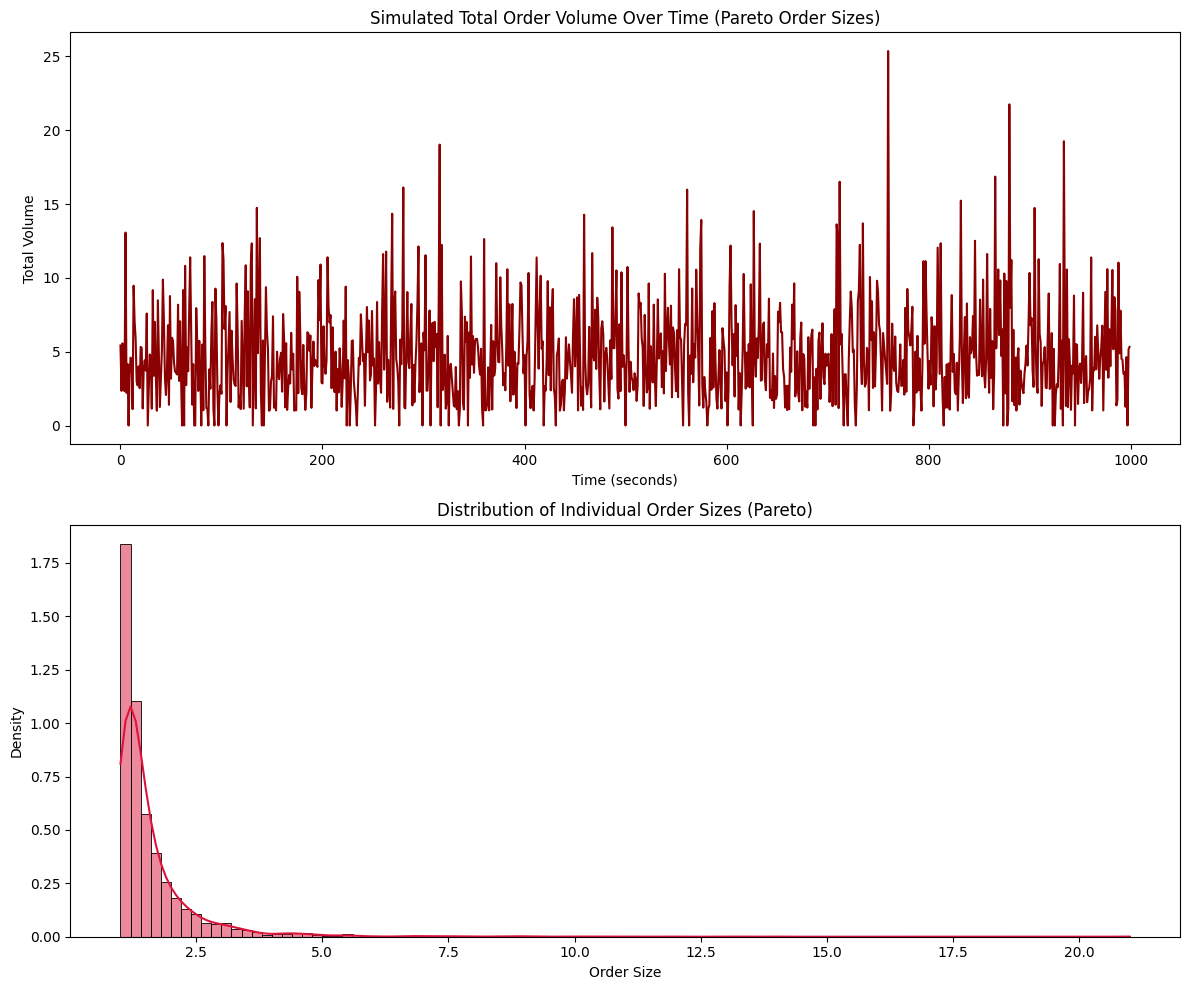

In [29]:
# Use Pareto distribution to simulate heavier-tailed order sizes
# Pareto Type I: PDF(x) = alpha * xm^alpha / x^(alpha+1), for x >= xm
alpha_pareto = 2.5  # shape parameter, lower => heavier tail
xm_pareto = 1.0     # minimum value

# Simulate order sizes using Pareto distribution
order_sizes_pareto = [xm_pareto * (1 + np.random.pareto(alpha_pareto, size=n)) for n in arrivals]

# Total volume per second
total_volume_pareto = np.array([np.sum(sizes) for sizes in order_sizes_pareto])

# Flatten all order sizes
all_order_sizes_pareto = np.concatenate(order_sizes_pareto)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot volume over time
axs[0].plot(total_volume_pareto, color='darkred', linewidth=1.5)
axs[0].set_title("Simulated Total Order Volume Over Time (Pareto Order Sizes)")
axs[0].set_xlabel("Time (seconds)")
axs[0].set_ylabel("Total Volume")

# Plot histogram of all order sizes
sns.histplot(all_order_sizes_pareto, bins=100, kde=True, stat="density", ax=axs[1], color='crimson')
axs[1].set_title("Distribution of Individual Order Sizes (Pareto)")
axs[1].set_xlabel("Order Size")
axs[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


# Updated Models


| Feature | First Version | Second Version (Current :)) |
| :--- | :--- | :--- |
| Model Design | Single mean/variance from a single encoder | Multiple experts + gating (mixture of experts) |
| Distribution | Only log-normal | Composite: log-normal + Pareto (LNP) with mixture weighting |
| Temporal Modeling | Shallow linear layers | Bidirectional GRU-based temporal encoder |
| Mixture Modeling | Hardcoded two components | Configurable number of experts via soft gating |

| Loss Function | Naive NLL approximation | Custom NLL + CRPS (calibrated predictive uncertainty) Current :) |
| :--- | :--- | :--- |
| Coverage | Not explicitly assessed | Interval estimates with proper scoring rules |
| Outlier Handling | None | Mixture model supports tail behavior (via Pareto component) |

| Feature | First Version | Second Version Current :) |
| :--- | :--- | :--- |
| Time Features | Not used | Time-of-day and day-of-week (sin/cos encoding) |
| Explicit Normalization | Applied globally, less clean | Normalization and clipping done cleanly |
| Custom Dataset | Fixed fields, implicit access | Modular, well-labeled, denormalization support |

| Training Element | First Version | Current :)|  |
| :--- | :--- | :--- | :--- |
| Scheduler | Used (ReduceLROnPlateau) | Same, consistent |  |
| Device Handling | Partial or missing | Full cuda / cpu support |  |
| Batch Norm or Stability | Not used | Robust with clamping and regularization |  |

In [30]:
train_size_fix=0.99

In [ ]:
import pandas as pd
import numpy as np
import datetime
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.nn import Softmax
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import pareto, norm
from utils_1 import read_txn_data, preprocess_txn_data, create_lob_dataset, merge_txn_and_lob


# Deseasonalization helper (unchanged)
def recalc(df: pd.DataFrame, train_size=train_size_fix) -> pd.DataFrame:
    df['time'] = df['datetime'].dt.time
    split = train_test_split(df, train_size=train_size_fix, shuffle=False)
    a = split[0].shape[0]
    train = df.iloc[:a].copy()
    train['mean_volume'] = train.groupby('time')['total_volume'].transform('mean')
    train['deseasoned_total_volume'] = train['total_volume'] / train['mean_volume']
    train['log_deseasoned_total_volume'] = np.log(train['deseasoned_total_volume'])
    rest = df.iloc[a:].copy()
    trange = pd.date_range("00:00:05", "23:59:05", freq='1min').time
    for t in trange:
        if (t in rest['time'].values) and (t in train['time'].values):
            rest.loc[rest['time']==t,'mean_volume'] = \
             train.loc[train['time']==t,'mean_volume'].iat[0]
    rest['deseasoned_total_volume'] = rest['total_volume'] / rest['mean_volume']
    rest['log_deseasoned_total_volume'] = np.log(rest['deseasoned_total_volume'])
    return pd.concat([train,rest])

class CustomDataset(Dataset):
    def __init__(self, df, h):
        self.trx = torch.tensor(df[['buy_volume','sell_volume','buy_txn','sell_txn','volume_imbalance','txn_imbalance']].to_numpy())
        self.lob = torch.tensor(df[['ask_volume','bid_volume','spread','lob_volume_imbalance',
                                    'ask_slope_1','ask_slope_5','ask_slope_10',
                                    'bid_slope_5','bid_slope_10','spread']].to_numpy())
        # Normalize log_deseasoned_total_volume
        y = df['log_deseasoned_total_volume'].to_numpy()
        self.y_mean = np.mean(y[np.isfinite(y)])
        self.y_std = np.std(y[np.isfinite(y)])
        y = (y - self.y_mean) / self.y_std
        y = np.clip(y, -10, 10)  # Cap extreme values
        self.y = torch.tensor(y)
        self.h = h

    def __len__(self):
        return len(self.y) - self.h

    def __getitem__(self, idx):
        trx = self.trx[idx:idx+self.h]  # shape (h,6)
        lob = self.lob[idx:idx+self.h]  # shape (h,10)
        label = self.y[idx+self.h]      # scalar
        return trx, lob, label

# Log-Normal-Pareto composite distribution
class LNP:
    def __init__(self, mu, sigma, alpha, threshold):
        self.mu = mu  # (batch, 2)
        self.sigma = sigma  # (batch, 2)
        self.alpha = alpha  # (batch, 2)
        self.threshold = threshold  # scalar
        self.lognorm_weight = nn.Parameter(torch.tensor(0.5, device=mu.device, dtype=mu.dtype))  # Learnable

    def log_pdf(self, x, eps=1e-6):
        x = x.expand(-1, 2)  # (batch, 2)
        # Log-normal PDF
        lognorm = -0.5 * torch.log(2 * np.pi * self.sigma**2) - (x - self.mu)**2 / (2 * self.sigma**2)
        # Pareto PDF
        pareto_log = torch.log(self.alpha) + self.alpha * torch.log(self.threshold) - (self.alpha + 1) * x
        # Indicator
        indicator = (x < torch.log(self.threshold)).float()  
        # Combine
        eps_tensor = torch.tensor(eps, device=x.device, dtype=x.dtype)
        lognorm_weight = torch.clamp(self.lognorm_weight, 0.1, 0.9)
        log_pdf = torch.log(lognorm_weight + eps_tensor) + lognorm * indicator + \
                  torch.log(1 - lognorm_weight + eps_tensor) + pareto_log * (1 - indicator)
        return log_pdf.clamp(min=-100, max=100) / 10.0  # Scale down for stability

class latent_dist(nn.Module):
    def __init__(self, h):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(h * (6 + 10), 64),
            nn.ReLU(),
            nn.Linear(64, 2),
        )
        self.soft = Softmax(dim=1)

    def forward(self, trx, lob):
        batch_size = trx.size(0)
        trx_flat = trx.permute(0, 2, 1).reshape(batch_size, -1)
        lob_flat = lob.permute(0, 2, 1).reshape(batch_size, -1)
        combined = torch.cat((trx_flat, lob_flat), dim=1)
        scores = self.mlp(combined)
        return self.soft(scores)

class lnp_expert(nn.Module):
    def __init__(self, h):
        super().__init__()
        self.meanR_trx = nn.Linear(h, 1, bias=False)
        self.meanL_trx = nn.Linear(6, 1, bias=True)
        self.meanR_lob = nn.Linear(h, 1, bias=False)
        self.meanL_lob = nn.Linear(10, 1, bias=True)
        self.varR_trx = nn.Linear(h, 1, bias=False)
        self.varL_trx = nn.Linear(6, 1, bias=True)
        self.varR_lob = nn.Linear(h, 1, bias=False)
        self.varL_lob = nn.Linear(10, 1, bias=True)
        self.alphaR_trx = nn.Linear(h, 1, bias=False)
        self.alphaL_trx = nn.Linear(6, 1, bias=True)
        self.alphaR_lob = nn.Linear(h, 1, bias=False)
        self.alphaL_lob = nn.Linear(10, 1, bias=True)
        self.threshold = nn.Parameter(torch.tensor(0.0))
        # Initialize mean layers to small values
        nn.init.normal_(self.meanL_trx.weight, mean=0, std=0.01)
        nn.init.normal_(self.meanL_lob.weight, mean=0, std=0.01)

    def forward(self, trx, lob):
        tm = self.meanL_trx(self.meanR_trx(trx).permute(0, 2, 1))
        lm = self.meanL_lob(self.meanR_lob(lob).permute(0, 2, 1))
        tv = self.varL_trx(self.varR_trx(trx).permute(0, 2, 1))
        lv = self.varL_lob(self.varR_lob(lob).permute(0, 2, 1))
        ta = self.alphaL_trx(self.alphaR_trx(trx).permute(0, 2, 1))
        la = self.alphaL_lob(self.alphaR_lob(lob).permute(0, 2, 1))
        mean = torch.cat((tm, lm), dim=1).squeeze(2)
        var = torch.clamp(torch.exp(torch.cat((tv, lv), dim=1).squeeze(2)), min=1e-4, max=10.0)
        alpha = torch.clamp(torch.exp(torch.cat((ta, la), dim=1).squeeze(2)), min=0.1, max=10.0)
        threshold = torch.clamp(torch.exp(self.threshold), min=0.1, max=5.0)  # Tighter range
        return mean, var, alpha, threshold

class hurdle_lnp(nn.Module):
    def __init__(self, h):
        super().__init__()
        self.bernoulli = nn.Sequential(
            nn.Linear(h * (6 + 10), 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        self.lnp_expert = lnp_expert(h)

    def forward(self, trx, lob):
        batch_size = trx.size(0)
        trx_flat = trx.permute(0, 2, 1).reshape(batch_size, -1)
        lob_flat = lob.permute(0, 2, 1).reshape(batch_size, -1)
        combined = torch.cat((trx_flat, lob_flat), dim=1)
        p_nonzero = self.bernoulli(combined)
        mean, var, alpha, threshold = self.lnp_expert(trx, lob)
        return p_nonzero, mean, var, alpha, threshold

class TME(nn.Module):
    def __init__(self, h):
        super().__init__()
        self.hurdle_lnp = hurdle_lnp(h)
        self.latent_dist = latent_dist(h)

    def forward(self, trx, lob):
        p_nonzero, mean, var, alpha, threshold = self.hurdle_lnp(trx, lob)
        prob = self.latent_dist(trx, lob)
        return p_nonzero, mean, var, alpha, threshold, prob

def TME_loss(pred, target, eps=1e-6):
    p_nonzero, mean, var, alpha, threshold, prob = pred
    target = target.unsqueeze(1)  # (batch, 1)
    batch_size = target.size(0)

    # Adjust zero threshold based on normalized data
    is_zero = (target <= -5.0).float()  # Assume normalized targets, -5 is a proxy for "near zero"
    bernoulli_loglik = is_zero * torch.log(1 - p_nonzero + eps) + \
                      (1 - is_zero) * torch.log(p_nonzero + eps)

    lnp = LNP(mean, var.sqrt(), alpha, threshold)
    lnp_loglik = lnp.log_pdf(target)  # (batch, 2)
    mix_ll = torch.sum(lnp_loglik * prob, dim=1)  # (batch,)
    mix_ll = (1 - is_zero.squeeze()) * mix_ll

    total_ll = bernoulli_loglik.squeeze() + mix_ll
    return -total_ll.mean()


trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df, freq='1min', fill_missing_ts=False)
df = merge_txn_and_lob(trx_df, lob_df)

# Check for NaN or inf in data
if df[['buy_volume','sell_volume','buy_txn','sell_txn','volume_imbalance','txn_imbalance',
       'ask_volume','bid_volume','spread','lob_volume_imbalance','ask_slope_1',
       'ask_slope_5','ask_slope_10','bid_slope_5','bid_slope_10']].isna().any().any():
    print("Warning: NaN values in features")
    df = df.fillna(0)
if np.isinf(df['log_deseasoned_total_volume']).any() or df['log_deseasoned_total_volume'].isna().any():
    print("Warning: Inf or NaN values in log_deseasoned_total_volume")
    df['log_deseasoned_total_volume'] = df['log_deseasoned_total_volume'].replace([np.inf, -np.inf], np.nan).fillna(0)

_, test_df = train_test_split(df, train_size=train_size_fix, shuffle=False)
train_df, val_df = train_test_split(_, train_size=train_size_fix, shuffle=False)

h = 3
lr = 1e-4
batch_size = 128
epochs = 20
Lambda = 1e-5

mu, sigma = train_df.iloc[:,1:].mean(), train_df.iloc[:,1:].std()
train_ds = CustomDataset((train_df.iloc[:,1:]-mu)/sigma, h)
val_ds = CustomDataset((val_df.iloc[:,1:]-mu)/sigma, h)
test_ds = CustomDataset((test_df.iloc[:,1:]-mu)/sigma, h)

train_loader = DataLoader(train_ds, batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size, shuffle=False)

model = TME(h).double()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=Lambda)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

mixture_over_epochs = []
time_coeff_trx_over_epochs = []
time_coeff_lob_over_epochs = []
feat_coeff_trx_over_epochs = []
feat_coeff_lob_over_epochs = []

# Cell 3: Training loop with debugging
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    model.train()
    train_loss = 0.0
    for i, (trx_batch, lob_batch, y) in enumerate(train_loader):
        trx_b = trx_batch.permute(0,2,1)
        lob_b = lob_batch.permute(0,2,1)

        pred = model(trx_b, lob_b) 
        loss = TME_loss(pred, y)
        train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        optimizer.zero_grad()

        # Debug: Print model outputs and target stats every 100 batches
        if i % 100 == 0:
            p_nonzero, mean, var, alpha, threshold, prob = pred
            print(f"Batch {i}: Loss={loss.item():.4f}, p_nonzero={p_nonzero.mean().item():.4f}, "
                  f"mean={mean.mean().item():.4f}, var={var.mean().item():.4f}, "
                  f"alpha={alpha.mean().item():.4f}, threshold={threshold.item():.4f}, "
                  f"target_mean={y.mean().item():.4f}, target_std={y.std().item():.4f}")

    train_loss_avg = train_loss / len(train_loader)
    print(f"Train Loss: {train_loss_avg:.4f}")

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for trx_b, lob_b, y_b in test_loader:
            trx_b = trx_b.permute(0,2,1)
            lob_b = lob_b.permute(0,2,1)
            test_loss += TME_loss(model(trx_b, lob_b), y_b).item()
    test_loss_avg = test_loss / len(test_loader)
    print(f"Test Loss: {test_loss_avg:.4f}")

    scheduler.step(test_loss_avg)  # Adjust learning rate

    with torch.no_grad():
        batch_weights = []
        for trx_batch, lob_batch, _ in train_loader:
            trx_b = trx_batch.permute(0,2,1)
            lob_b = lob_batch.permute(0,2,1)
            probs = model.latent_dist(trx_b, lob_b)
            batch_weights.append(probs.mean(0).cpu().numpy())
    mixture_over_epochs.append(np.mean(batch_weights, axis=0))

    R_trx_w = model.latent_dist.mlp[0].weight.data.cpu().numpy().ravel()[:h*6]
    R_lob_w = model.latent_dist.mlp[0].weight.data.cpu().numpy().ravel()[h*6:]
    time_coeff_trx_over_epochs.append(R_trx_w)
    time_coeff_lob_over_epochs.append(R_lob_w)

    L_trx_w = model.hurdle_lnp.lnp_expert.meanL_trx.weight.data.cpu().numpy().ravel()
    L_lob_w = model.hurdle_lnp.lnp_expert.meanL_lob.weight.data.cpu().numpy().ravel()
    feat_coeff_trx_over_epochs.append(L_trx_w)
    feat_coeff_lob_over_epochs.append(L_lob_w)




trx Data loaded successfully.
preprocessed lob Data loaded successfully.

Epoch 1/20
Batch 0: Loss=1.0101, p_nonzero=0.4747, mean=-0.2071, var=1.0829, alpha=1.0974, threshold=1.0000, target_mean=-0.0783, target_std=0.8491
Batch 100: Loss=0.9056, p_nonzero=0.5259, mean=-0.2142, var=1.1407, alpha=1.1419, threshold=1.0094, target_mean=0.3435, target_std=0.7014
Batch 200: Loss=0.8400, p_nonzero=0.5625, mean=-0.2006, var=1.1034, alpha=1.1435, threshold=1.0179, target_mean=0.4192, target_std=0.6349
Batch 300: Loss=0.8273, p_nonzero=0.5689, mean=-0.2379, var=1.0588, alpha=1.1220, threshold=1.0276, target_mean=-0.2364, target_std=0.8860
Batch 400: Loss=0.7188, p_nonzero=0.6345, mean=-0.2415, var=1.0771, alpha=1.1990, threshold=1.0382, target_mean=0.3615, target_std=0.7031
Batch 500: Loss=0.4366, p_nonzero=0.8283, mean=-0.2904, var=1.0196, alpha=1.1685, threshold=1.0496, target_mean=0.3201, target_std=0.6202
Batch 600: Loss=0.6583, p_nonzero=0.6654, mean=-0.2255, var=1.0415, alpha=1.1836, thres

In [32]:
def plot_training_curves(train_losses, val_losses, save_path="learning_curves.png", show_plot=False):
    """
    Plot training and validation loss curves.

    Args:
        train_losses (list): List of training losses per epoch.
        val_losses (list): List of validation losses per epoch.
        save_path (str): Path to save the plot.
        show_plot (bool): If True, display the plot interactively.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label="Training Loss", color="blue", linewidth=2, linestyle="-")
    plt.plot(val_losses, label="Validation Loss", color="orange", linewidth=2, linestyle="--")
    plt.yscale("log")
    plt.title(f"Learning Curves (Final Val Loss: {val_losses[-1]:.4f})")
    plt.xlabel("Epoch")
    plt.ylabel("Negative Log-Likelihood (Log Scale)")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    
    if show_plot:
        plt.show()
    plt.close()

def plot_mixture_weights(mixture_weights, save_path="mixture_weights.png", show_plot=False):
    """
    Plot mixture component weights over training epochs.

    Args:
        mixture_weights (np.ndarray): Array of shape (epochs, n_components) with mixture weights.
        save_path (str): Path to save the plot.
        show_plot (bool): If True, display the plot interactively.
    """
    plt.figure(figsize=(12, 6))
    n_components = mixture_weights.shape[1]
    colors = ["blue", "orange", "green", "red"][:n_components]
    for i in range(n_components):
        plt.plot(mixture_weights[:, i], label=f"Component {i+1}", color=colors[i], linewidth=2)
        plt.text(len(mixture_weights) - 1, mixture_weights[-1, i], f"{mixture_weights[-1, i]:.3f}",
                 color=colors[i], ha="left", va="center")
    plt.title("Mixture Component Weights Over Training")
    plt.xlabel("Epoch")
    plt.ylabel("Weight")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    if show_plot:
        plt.show()
    plt.close()

def plot_time_series_predictions(
    datetimes,
    y_true,
    y_pred,
    save_path="time_series_predictions.png",
    show_plot=False,
    title="Actual vs. Predicted Log-Deseasoned Total Volume"
):
    """
    Plot a time series of actual vs. predicted values.

    Args:
        datetimes (np.ndarray or pd.Series): Datetime index for the test data.
        y_true (np.ndarray): True values (denormalized).
        y_pred (np.ndarray): Predicted values (denormalized).
        save_path (str): Path to save the plot.
        show_plot (bool): If True, display the plot interactively.
        title (str): Plot title.
    """
    plt.figure(figsize=(14, 6))
    plt.plot(datetimes, y_true, label="Actual", color="blue", linewidth=1.5)
    plt.plot(datetimes, y_pred, label="Predicted", color="orange", linestyle="--", linewidth=1.5)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Log-Deseasoned Total Volume")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    if show_plot:
        plt.show()
    plt.close()

def plot_scatter_predictions(
    y_true,
    y_pred,
    save_path="scatter_predictions.png",
    show_plot=False,
    title="Actual vs. Predicted Log-Deseasoned Total Volume"
):
    """
    Plot a scatter of actual vs. predicted values.

    Args:
        y_true (np.ndarray): True values (denormalized).
        y_pred (np.ndarray): Predicted values (denormalized).
        save_path (str): Path to save the plot.
        show_plot (bool): If True, display the plot interactively.
        title (str): Plot title.
    """
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.5, color="blue", s=50)
    min_val, max_val = min(min(y_true), min(y_pred)), max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="y=x")
    plt.title(title)
    plt.xlabel("Actual Log-Deseasoned Total Volume")
    plt.ylabel("Predicted Log-Deseasoned Total Volume")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
 
    if show_plot:
        plt.show()
    plt.close()

def plot_error_distribution(
    y_true,
    y_pred,
    save_path="error_distribution.png",
    show_plot=False,
    title="Prediction Error Distribution"
):
    """
    Plot the distribution of prediction errors.

    Args:
        y_true (np.ndarray): True values (denormalized).
        y_pred (np.ndarray): Predicted values (denormalized).
        save_path (str): Path to save the plot.
        show_plot (bool): If True, display the plot interactively.
        title (str): Plot title.
    """
    errors = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, bins=50, kde=True, color="blue", stat="density")
    plt.title(title)
    plt.xlabel("Prediction Error (Actual - Predicted)")
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()

    if show_plot:
        plt.show()
    plt.close()

def plot_probabilistic_predictions(
    datetimes,
    y_true,
    means,
    vars,
    probs,
    n_samples=10,
    save_path="probabilistic_predictions.png",
    show_plot=False,
    title="Probabilistic Predictions (Subset)"
):
    """
    Plot the predictive distribution for a subset of test points.

    Args:
        datetimes (np.ndarray or pd.Series): Datetime index for the test data.
        y_true (np.ndarray): True values (denormalized).
        means (np.ndarray): Predicted means for each mixture component (batch, n_components).
        vars (np.ndarray): Predicted variances for each mixture component (batch, n_components).
        probs (np.ndarray): Mixture weights (batch, n_components).
        n_samples (int): Number of samples to plot.
        save_path (str): Path to save the plot.
        show_plot (bool): If True, display the plot interactively.
        title (str): Plot title.
    """
    plt.figure(figsize=(14, 6))
    indices = np.random.choice(len(y_true), n_samples, replace=False)
    for i in indices:
        plt.scatter(datetimes[i], y_true[i], color="blue", label="Actual" if i == indices[0] else "")
        mean = np.sum(means[i] * probs[i])
        std = np.sqrt(np.sum(vars[i] * probs[i]))
        plt.errorbar(
            datetimes[i], mean, yerr=std, fmt="o", color="orange",
            label="Predicted (Mean ± Std)" if i == indices[0] else ""
        )
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Log-Deseasoned Total Volume")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
  
    plt.show()

y_true shape: (1501,), y_pred shape: (1501,), var shape: (1501, 2)
RMSE: 1.0475
NLL:  0.2791
CRPS: 0.6074
90% coverage: 0.8621
MAPE: 92.03%


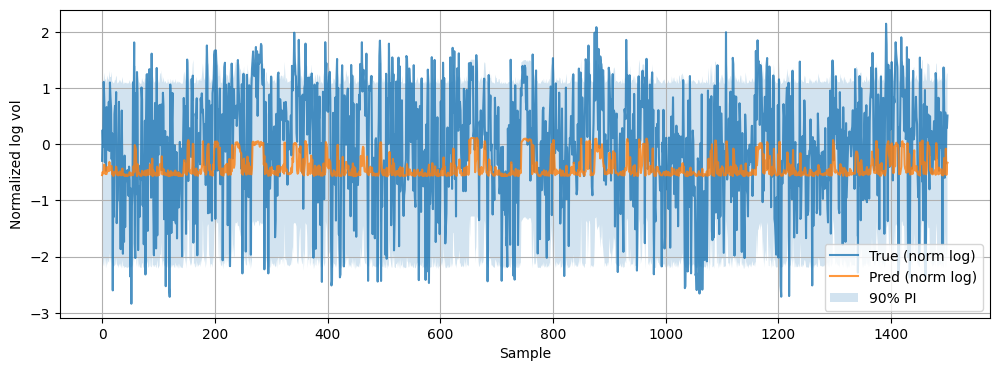

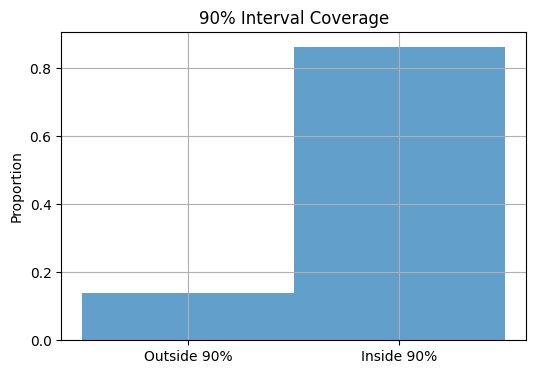

In [33]:
import numpy as np
import torch
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import properscoring as ps
import matplotlib.pyplot as plt

# --- initialize accumulators ---
y_trues = []
y_preds = []
p_nonzeros = []
lower_intervals = []
upper_intervals = []
log_likelihoods = []
vars_list = []

# --- evaluation loop ---
model.eval()
with torch.no_grad():
    for trx_batch, lob_batch, y in test_loader:
        trx_b = trx_batch.permute(0,2,1)
        lob_b = lob_batch.permute(0,2,1)

        p_nonzero, mean, var, alpha, threshold, prob = model(trx_b, lob_b)

        # Expected log-volume
        pred_log = p_nonzero.squeeze() * (mean * prob).sum(dim=1)
        
        # 90% pred-interval
        std = var.sqrt()
        z = norm.ppf(0.95)
        base = (mean * prob).sum(dim=1)
        lower = base - z * (std * prob).sum(dim=1)
        upper = base + z * (std * prob).sum(dim=1)

        # log-likelihood
        lnp = LNP(mean, std, alpha, threshold)
        ll   = lnp.log_pdf(y.unsqueeze(1))
        mix_ll = torch.sum(ll * prob, dim=1)
        ll_total = p_nonzero.squeeze() * mix_ll + (1 - p_nonzero.squeeze()) * (y <= -5.0).float()

        # collect
        y_trues.append(y.cpu().numpy())
        y_preds.append(pred_log.cpu().numpy())
        p_nonzeros.append(p_nonzero.cpu().numpy())
        lower_intervals.append(lower.cpu().numpy())
        upper_intervals.append(upper.cpu().numpy())
        log_likelihoods.append(ll_total.cpu().numpy())
        vars_list.append(var.cpu().numpy())

# --- stack / concat ---
y_true = np.concatenate(y_trues)
y_pred = np.concatenate(y_preds)
p_nonzero = np.concatenate(p_nonzeros)
lower = np.concatenate(lower_intervals)
upper = np.concatenate(upper_intervals)
log_likelihoods = np.concatenate(log_likelihoods)
var = np.concatenate(vars_list, axis=0)

print(f"y_true shape: {y_true.shape}, y_pred shape: {y_pred.shape}, var shape: {var.shape}")

# --- metrics ---
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
nll  = -np.mean(log_likelihoods)
crps = np.mean([
    ps.crps_gaussian(y_true[i], mu=y_pred[i], sig=np.sqrt(var[i].mean()))
    for i in range(len(y_true))
])
coverage = np.mean((y_true >= lower) & (y_true <= upper))

# de-normalize & MAPE
y_true_exp = np.exp(y_true * test_ds.y_std + test_ds.y_mean)
y_pred_exp = np.exp(y_pred * test_ds.y_std + test_ds.y_mean)
mape = np.mean(np.abs((y_true_exp - y_pred_exp) / y_true_exp)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"NLL:  {nll:.4f}")
print(f"CRPS: {crps:.4f}")
print(f"90% coverage: {coverage:.4f}")
print(f"MAPE: {mape:.2f}%")

# --- plots ---
plt.figure(figsize=(12,4))
plt.plot(y_true, label='True (norm log)', alpha=0.8)
plt.plot(y_pred, label='Pred (norm log)', alpha=0.8)
plt.fill_between(np.arange(len(y_true)), lower, upper, alpha=0.2, label='90% PI')
plt.legend(); plt.xlabel('Sample'); plt.ylabel('Normalized log vol'); plt.grid(True)

plt.figure(figsize=(6,4))
inside = ((y_true >= lower) & (y_true <= upper)).astype(int)
plt.hist(inside, bins=[0,1,2], density=True, alpha=0.7)
plt.xticks([0.5,1.5], ['Outside 90%','Inside 90%'])
plt.ylabel('Proportion'); plt.title('90% Interval Coverage'); plt.grid(True)

plt.show()


In [34]:
# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
metrics = {
    'MSE': mean_squared_error(y_true, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
    'MAE': mean_absolute_error(y_true, y_pred),
    'MAPE': np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100,  # Adding small epsilon to avoid division by zero
    'R²': r2_score(y_true, y_pred),
    'Median Absolute Error': np.median(np.abs(y_true - y_pred)),
    'Mean Absolute Scaled Error (MASE)': np.mean(np.abs(y_true - y_pred)) / np.mean(np.abs(y_true[1:] - y_true[:-1])),
}

# Print metrics with explanations
print("Model Performance Metrics:")
print("="*40)
for metric, value in metrics.items():
    print(f"{metric:25}: {value:.4f}")

Model Performance Metrics:
MSE                      : 1.0973
RMSE                     : 1.0475
MAE                      : 0.8724
MAPE                     : 409.9400
R²                       : -0.0954
Median Absolute Error    : 0.8015
Mean Absolute Scaled Error (MASE): 0.9474


In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Back-transform both to original volume scale
y_true = np.exp(y_true)
y_pred = np.exp(y_pred)

# Compute metrics on the original scale
mse   = mean_squared_error(y_true, y_pred)
rmse  = np.sqrt(mse)
mae   = mean_absolute_error(y_true, y_pred)
mape  = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
r2    = r2_score(y_true, y_pred)
medae = np.median(np.abs(y_true - y_pred))
mase  = np.mean(np.abs(y_true - y_pred)) / np.mean(np.abs(y_true[1:] - y_true[:-1]))

# Display
print("Performance on Original Volume Scale")
print("="*40)
print(f"{'MSE':25}: {mse:.4f}")
print(f"{'RMSE':25}: {rmse:.4f}")
print(f"{'MAE':25}: {mae:.4f}")
print(f"{'MAPE (%)':25}: {mape:.2f}%")
print(f"{'R²':25}: {r2:.4f}")
print(f"{'Median Absolute Error':25}: {medae:.4f}")
print(f"{'Mean Absolute Scaled Error':25}: {mase:.4f}")


Performance on Original Volume Scale
MSE                      : 2.4501
RMSE                     : 1.5653
MAE                      : 1.0311
MAPE (%)                 : 86.56%
R²                       : -0.3352
Median Absolute Error    : 0.5033
Mean Absolute Scaled Error: 0.9418


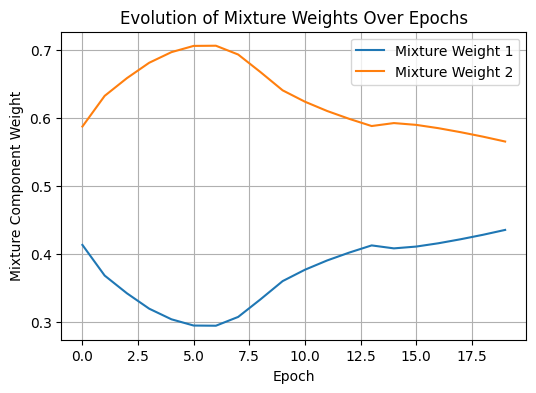

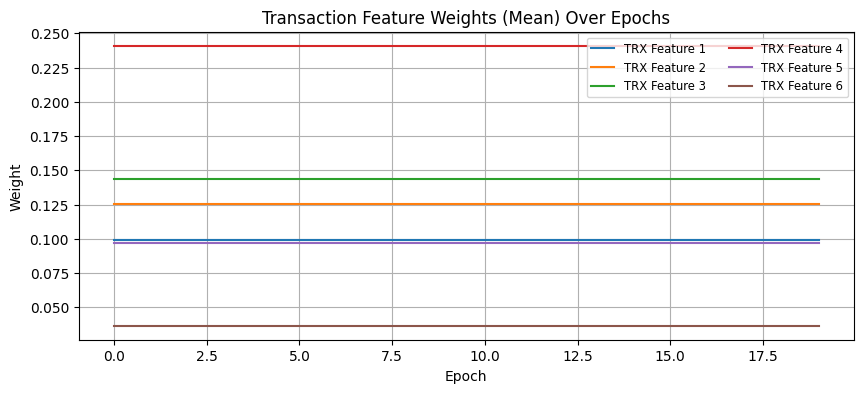

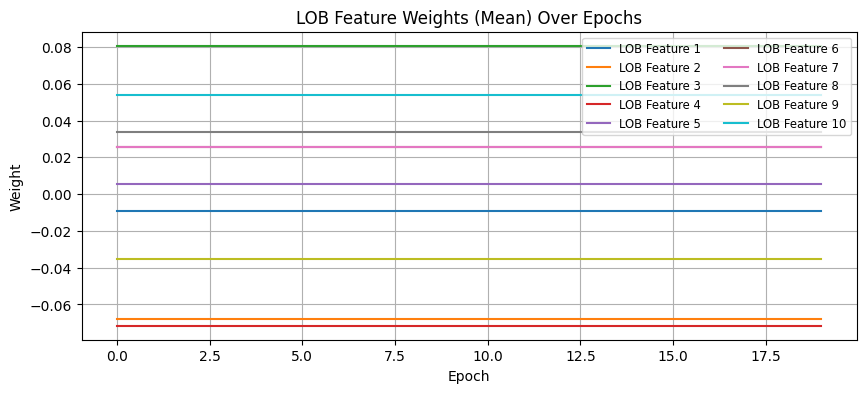

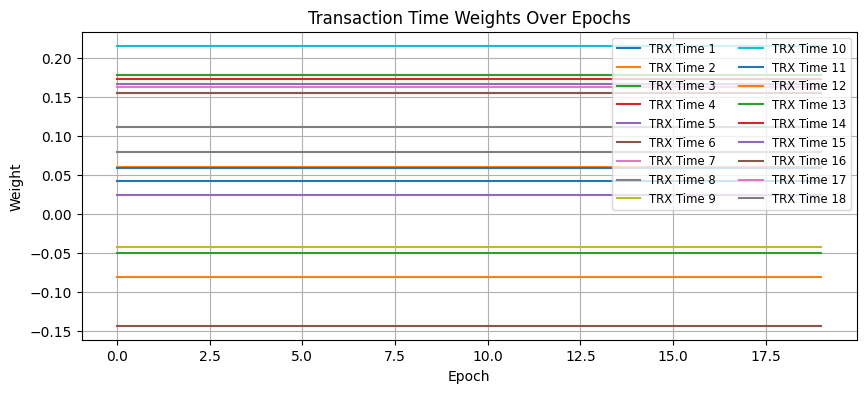

In [36]:
# Plot mixture weights over epochs
plt.figure(figsize=(6, 4))
mixture_over_epochs = np.array(mixture_over_epochs)
plt.plot(mixture_over_epochs[:, 0], label='Mixture Weight 1')
plt.plot(mixture_over_epochs[:, 1], label='Mixture Weight 2')
plt.xlabel('Epoch')
plt.ylabel('Mixture Component Weight')
plt.title('Evolution of Mixture Weights Over Epochs')
plt.legend()
plt.grid(True)

# Plot feature coefficients for transaction features
plt.figure(figsize=(10, 4))
feat_coeff_trx_over_epochs = np.array(feat_coeff_trx_over_epochs)
for i in range(feat_coeff_trx_over_epochs.shape[1]):
    plt.plot(feat_coeff_trx_over_epochs[:, i], label=f'TRX Feature {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Weight')
plt.title('Transaction Feature Weights (Mean) Over Epochs')
plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.grid(True)

# Plot feature coefficients for LOB features
plt.figure(figsize=(10, 4))
feat_coeff_lob_over_epochs = np.array(feat_coeff_lob_over_epochs)
for i in range(feat_coeff_lob_over_epochs.shape[1]):
    plt.plot(feat_coeff_lob_over_epochs[:, i], label=f'LOB Feature {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Weight')
plt.title('LOB Feature Weights (Mean) Over Epochs')
plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.grid(True)

# Plot time coefficients for transaction inputs
plt.figure(figsize=(10, 4))
time_coeff_trx_over_epochs = np.array(time_coeff_trx_over_epochs)
for i in range(time_coeff_trx_over_epochs.shape[1]):
    plt.plot(time_coeff_trx_over_epochs[:, i], label=f'TRX Time {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Weight')
plt.title('Transaction Time Weights Over Epochs')
plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.grid(True)



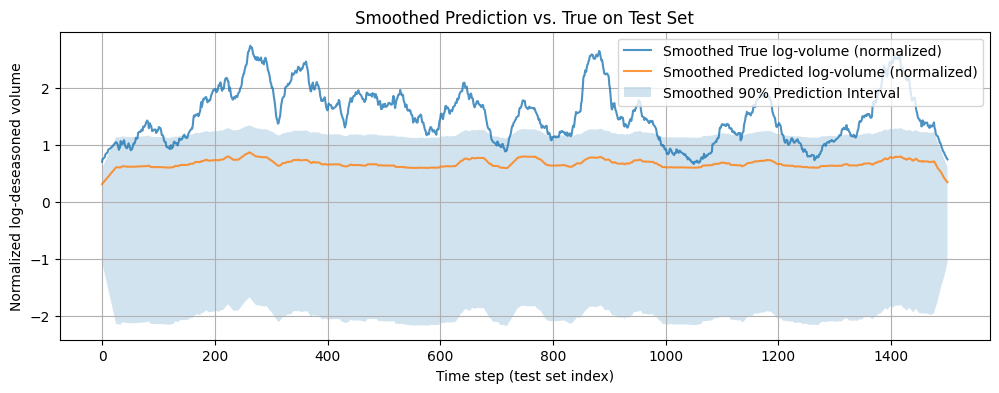

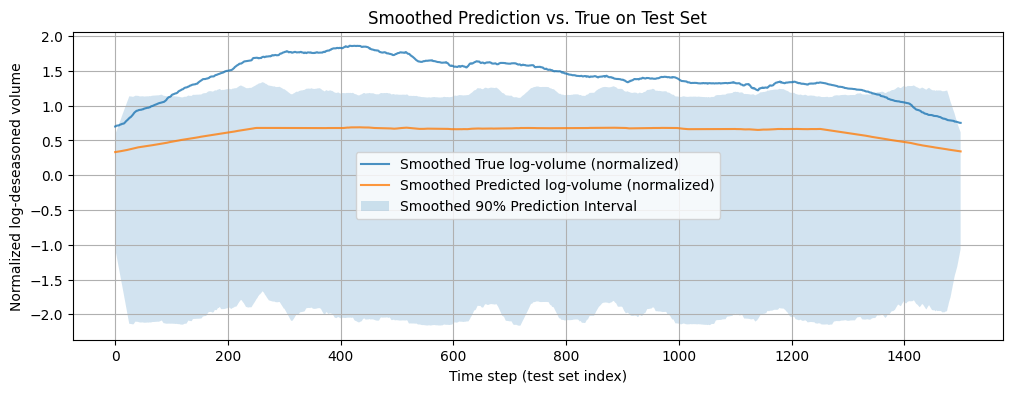

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Smoothing function: Moving Average
def moving_average(x, window_size=50):
    return np.convolve(x, np.ones(window_size)/window_size, mode='same')



# Apply smoothing
y_true_smooth = moving_average(y_true)
y_pred_smooth = moving_average(y_pred)
lower_smooth = moving_average(lower)
upper_smooth = moving_average(upper)

# Plot smoothed prediction vs. true
plt.figure(figsize=(12, 4))
plt.plot(y_true_smooth, label='Smoothed True log-volume (normalized)', alpha=0.8)
plt.plot(y_pred_smooth, label='Smoothed Predicted log-volume (normalized)', alpha=0.8)
plt.fill_between(range(len(y_true)), lower_smooth, upper_smooth, alpha=0.2, label='Smoothed 90% Prediction Interval')
plt.xlabel('Time step (test set index)')
plt.ylabel('Normalized log-deseasoned volume')
plt.title('Smoothed Prediction vs. True on Test Set')
plt.legend()
plt.grid(True)


# Apply smoothing
y_true_smooth = moving_average(y_true, window_size=500)
y_pred_smooth = moving_average(y_pred, window_size=500)
lower_smooth = moving_average(lower)
upper_smooth = moving_average(upper)


# Plot smoothed prediction vs. true
plt.figure(figsize=(12, 4))
plt.plot(y_true_smooth, label='Smoothed True log-volume (normalized)', alpha=0.8)
plt.plot(y_pred_smooth, label='Smoothed Predicted log-volume (normalized)', alpha=0.8)
plt.fill_between(range(len(y_true)), lower_smooth, upper_smooth, alpha=0.2, label='Smoothed 90% Prediction Interval')
plt.xlabel('Time step (test set index)')
plt.ylabel('Normalized log-deseasoned volume')
plt.title('Smoothed Prediction vs. True on Test Set')
plt.legend()
plt.grid(True)


plt.show()


# More sensitive version

1. No clipping of your target, so spikes survive
2. Loosened weight decay (set to 0 ) and higher learning rate
3. Deeper, nonlinear experts $(64 \rightarrow 32 \rightarrow \mu / \sigma / \alpha)$ instead of pure bilinear
4. Deeper gating network $(128 \rightarrow 64 \rightarrow 2)$ for more flexible mixture weights
5. Removed the $/ 10$ scaling in the custom log-pdf
6. Example of ensembling at inference time

In [38]:
train_size_fix=0.99

In [ ]:
import pandas as pd
import numpy as np
import datetime
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.nn import Softmax
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import pareto, norm
from utils_1 import read_txn_data, preprocess_txn_data, create_lob_dataset, merge_txn_and_lob

# Deseasonalization helper (unchanged)
def recalc(df: pd.DataFrame, train_size=train_size_fix) -> pd.DataFrame:
    df['time'] = df['datetime'].dt.time
    split = train_test_split(df, train_size=train_size, shuffle=False)
    a = split[0].shape[0]
    train = df.iloc[:a].copy()
    train['mean_volume'] = train.groupby('time')['total_volume'].transform('mean')
    train['deseasoned_total_volume'] = train['total_volume'] / train['mean_volume']
    train['log_deseasoned_total_volume'] = np.log(train['deseasoned_total_volume'])
    rest = df.iloc[a:].copy()
    trange = pd.date_range("00:00:05", "23:59:05", freq='1min').time
    for t in trange:
        if (t in rest['time'].values) and (t in train['time'].values):
            rest.loc[rest['time']==t,'mean_volume'] = \
             train.loc[train['time']==t,'mean_volume'].iat[0]
    rest['deseasoned_total_volume'] = rest['total_volume'] / rest['mean_volume']
    rest['log_deseasoned_total_volume'] = np.log(rest['deseasoned_total_volume'])
    return pd.concat([train,rest])

class CustomDataset(Dataset):
    def __init__(self, df, h):
        self.trx = torch.tensor(df[['buy_volume','sell_volume','buy_txn','sell_txn','volume_imbalance','txn_imbalance']].to_numpy())
        self.lob = torch.tensor(df[['ask_volume','bid_volume','spread','lob_volume_imbalance',
                                    'ask_slope_1','ask_slope_5','ask_slope_10',
                                    'bid_slope_5','bid_slope_10','spread']].to_numpy())
        # Normalize log_deseasoned_total_volume without clipping
        y = df['log_deseasoned_total_volume'].to_numpy()
        self.y_mean = np.mean(y[np.isfinite(y)])
        self.y_std = np.std(y[np.isfinite(y)])
        y = (y - self.y_mean) / self.y_std
        self.y = torch.tensor(y)
        self.h = h

    def __len__(self):
        return len(self.y) - self.h

    def __getitem__(self, idx):
        trx = self.trx[idx:idx+self.h]  # shape (h,6)
        lob = self.lob[idx:idx+self.h]  # shape (h,10)
        label = self.y[idx+self.h]      # scalar
        return trx, lob, label

# Log-Normal-Pareto composite distribution
class LNP:
    def __init__(self, mu, sigma, alpha, threshold):
        self.mu = mu
        self.sigma = sigma
        self.alpha = alpha
        self.threshold = threshold
        self.lognorm_weight = nn.Parameter(torch.tensor(0.5, device=mu.device, dtype=mu.dtype))

    def log_pdf(self, x, eps=1e-6):
        x = x.expand(-1, 2)
        lognorm = -0.5 * torch.log(2 * np.pi * self.sigma**2) - (x - self.mu)**2 / (2 * self.sigma**2)
        pareto_log = torch.log(self.alpha) + self.alpha * torch.log(self.threshold) - (self.alpha + 1) * x
        indicator = (x < torch.log(self.threshold)).float()
        eps_tensor = torch.tensor(eps, device=x.device, dtype=x.dtype)
        lognorm_weight = torch.clamp(self.lognorm_weight, 0.1, 0.9)
        log_pdf = torch.log(lognorm_weight + eps_tensor) + lognorm * indicator + \
                  torch.log(1 - lognorm_weight + eps_tensor) + pareto_log * (1 - indicator)
        return log_pdf.clamp(min=-100, max=100)  # Removed /10 scaling

class latent_dist(nn.Module):
    def __init__(self, h):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(h * (6 + 10), 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
        )
        self.soft = Softmax(dim=1)

    def forward(self, trx, lob):
        batch_size = trx.size(0)
        trx_flat = trx.permute(0, 2, 1).reshape(batch_size, -1)
        lob_flat = lob.permute(0, 2, 1).reshape(batch_size, -1)
        combined = torch.cat((trx_flat, lob_flat), dim=1)
        scores = self.mlp(combined)
        return self.soft(scores)

class lnp_expert(nn.Module):
    def __init__(self, h):
        super().__init__()
        self.trx_net = nn.Sequential(
            nn.Linear(h * 6, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
        )
        self.lob_net = nn.Sequential(
            nn.Linear(h * 10, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
        )
        self.mean_head = nn.Linear(64, 1)
        self.var_head = nn.Linear(64, 1)
        self.alpha_head = nn.Linear(64, 1)
        self.threshold = nn.Parameter(torch.tensor(0.0))
        
        # Initialize weights
        nn.init.normal_(self.mean_head.weight, mean=0, std=0.01)
        nn.init.normal_(self.var_head.weight, mean=0, std=0.01)
        nn.init.normal_(self.alpha_head.weight, mean=0, std=0.01)

    def forward(self, trx, lob):
        batch_size = trx.size(0)
        trx_flat = trx.permute(0, 2, 1).reshape(batch_size, -1)
        lob_flat = lob.permute(0, 2, 1).reshape(batch_size, -1)
        
        trx_feat = self.trx_net(trx_flat)
        lob_feat = self.lob_net(lob_flat)
        combined = torch.cat((trx_feat, lob_feat), dim=1)
        
        mean = self.mean_head(combined)
        var = torch.clamp(torch.exp(self.var_head(combined)), min=1e-4, max=10.0)
        alpha = torch.clamp(torch.exp(self.alpha_head(combined)), min=0.1, max=10.0)
        threshold = torch.clamp(torch.exp(self.threshold), min=0.1, max=5.0)
        
        return mean.expand(-1, 2), var.expand(-1, 2), alpha.expand(-1, 2), threshold

class hurdle_lnp(nn.Module):
    def __init__(self, h):
        super().__init__()
        self.bernoulli = nn.Sequential(
            nn.Linear(h * (6 + 10), 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        self.lnp_expert = lnp_expert(h)

    def forward(self, trx, lob):
        batch_size = trx.size(0)
        trx_flat = trx.permute(0, 2, 1).reshape(batch_size, -1)
        lob_flat = lob.permute(0, 2, 1).reshape(batch_size, -1)
        combined = torch.cat((trx_flat, lob_flat), dim=1)
        p_nonzero = self.bernoulli(combined)
        mean, var, alpha, threshold = self.lnp_expert(trx, lob)
        return p_nonzero, mean, var, alpha, threshold

class TME(nn.Module):
    def __init__(self, h):
        super().__init__()
        self.hurdle_lnp = hurdle_lnp(h)
        self.latent_dist = latent_dist(h)

    def forward(self, trx, lob):
        p_nonzero, mean, var, alpha, threshold = self.hurdle_lnp(trx, lob)
        prob = self.latent_dist(trx, lob)
        return p_nonzero, mean, var, alpha, threshold, prob

def TME_loss(pred, target, eps=1e-6):
    p_nonzero, mean, var, alpha, threshold, prob = pred
    target = target.unsqueeze(1)
    batch_size = target.size(0)

    is_zero = (target <= -5.0).float()
    bernoulli_loglik = is_zero * torch.log(1 - p_nonzero + eps) + \
                      (1 - is_zero) * torch.log(p_nonzero + eps)

    lnp = LNP(mean, var.sqrt(), alpha, threshold)
    lnp_loglik = lnp.log_pdf(target)
    mix_ll = torch.sum(lnp_loglik * prob, dim=1)
    mix_ll = (1 - is_zero.squeeze()) * mix_ll

    total_ll = bernoulli_loglik.squeeze() + mix_ll
    return -total_ll.mean()

# Data loading and preprocessing
trx_df = read_txn_data(use_load=False)
lob_df = create_lob_dataset(use_load=False)
trx_df = preprocess_txn_data(trx_df, freq='1min', fill_missing_ts=False)
df = merge_txn_and_lob(trx_df, lob_df)

if df[['buy_volume','sell_volume','buy_txn','sell_txn','volume_imbalance','txn_imbalance',
       'ask_volume','bid_volume','spread','lob_volume_imbalance','ask_slope_1',
       'ask_slope_5','ask_slope_10','bid_slope_5','bid_slope_10']].isna().any().any():
    print("Warning: NaN values in features")
    df = df.fillna(0)
if np.isinf(df['log_deseasoned_total_volume']).any() or df['log_deseasoned_total_volume'].isna().any():
    print("Warning: Inf or NaN values in log_deseasoned_total_volume")
    df['log_deseasoned_total_volume'] = df['log_deseasoned_total_volume'].replace([np.inf, -np.inf], np.nan).fillna(0)

_, test_df = train_test_split(df, train_size=0.99, shuffle=False)
train_df, val_df = train_test_split(_, train_size=7/8, shuffle=False)

h = 3
lr = 1e-3  # Increased learning rate
batch_size = 128
epochs = 20
Lambda = 0  # Zero weight decay

mu, sigma = train_df.iloc[:,1:].mean(), train_df.iloc[:,1:].std()
train_ds = CustomDataset((train_df.iloc[:,1:]-mu)/sigma, h)
val_ds = CustomDataset((val_df.iloc[:,1:]-mu)/sigma, h)
test_ds = CustomDataset((test_df.iloc[:,1:]-mu)/sigma, h)

train_loader = DataLoader(train_ds, batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size, shuffle=False)

# Initialize multiple models for ensembling
n_models = 3
models = [TME(h).double() for _ in range(n_models)]
optimizers = [torch.optim.Adam(model.parameters(), lr=lr, weight_decay=Lambda) for model in models]
schedulers = [torch.optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min', factor=0.5, patience=5) for opt in optimizers]

# Training loop
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    for model, optimizer in zip(models, optimizers):
        model.train()
        train_loss = 0.0
        for i, (trx_batch, lob_batch, y) in enumerate(train_loader):
            trx_b = trx_batch.permute(0,2,1)
            lob_b = lob_batch.permute(0,2,1)

            pred = model(trx_b, lob_b)
            loss = TME_loss(pred, y)
            train_loss += loss.item()

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            optimizer.zero_grad()

            if i % 100 == 0:
                p_nonzero, mean, var, alpha, threshold, prob = pred
                print(f"Model {models.index(model)} Batch {i}: Loss={loss.item():.4f}, "
                      f"p_nonzero={p_nonzero.mean().item():.4f}, mean={mean.mean().item():.4f}")

        train_loss_avg = train_loss / len(train_loader)
        print(f"Model {models.index(model)} Train Loss: {train_loss_avg:.4f}")

        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for trx_b, lob_b, y_b in test_loader:
                trx_b = trx_b.permute(0,2,1)
                lob_b = lob_b.permute(0,2,1)
                test_loss += TME_loss(model(trx_b, lob_b), y_b).item()
        test_loss_avg = test_loss / len(test_loader)
        print(f"Model {models.index(model)} Test Loss: {test_loss_avg:.4f}")

        schedulers[models.index(model)].step(test_loss_avg)

# Ensemble inference example
def ensemble_predict(models, trx, lob):
    with torch.no_grad():
        log_liks = []
        for model in models:
            model.eval()
            p_nonzero, mean, var, alpha, threshold, prob = model(trx, lob)
            lnp = LNP(mean, var.sqrt(), alpha, threshold)
            log_lik = lnp.log_pdf(torch.zeros_like(mean))  # Example: predict at target=0
            log_lik = torch.sum(log_lik * prob, dim=1)
            log_liks.append(log_lik)
        # Average log-likelihoods
        ensemble_log_lik = torch.mean(torch.stack(log_liks), dim=0)
        return ensemble_log_lik

# Example usage of ensemble prediction
model.eval()
with torch.no_grad():
    for trx_b, lob_b, y_b in test_loader:
        trx_b = trx_b.permute(0,2,1)
        lob_b = lob_b.permute(0,2,1)
        ensemble_log_lik = ensemble_predict(models, trx_b, lob_b)
        print(f"Ensemble log-likelihood: {ensemble_log_lik.mean().item():.4f}")
        break  # Just show one batch

trx Data loaded successfully.
preprocessed lob Data loaded successfully.

Epoch 1/20
Model 0 Batch 0: Loss=3.4682, p_nonzero=0.4591, mean=-0.0979
Model 0 Batch 100: Loss=2.7142, p_nonzero=0.7994, mean=-0.4440
Model 0 Batch 200: Loss=2.5360, p_nonzero=0.9642, mean=-0.5669
Model 0 Batch 300: Loss=2.4511, p_nonzero=0.9606, mean=-0.4820
Model 0 Batch 400: Loss=2.4134, p_nonzero=0.9825, mean=-0.2889
Model 0 Batch 500: Loss=2.3904, p_nonzero=0.9997, mean=-0.4807
Model 0 Batch 600: Loss=2.3868, p_nonzero=0.9998, mean=-0.3304
Model 0 Batch 700: Loss=2.7670, p_nonzero=0.9905, mean=-0.4235
Model 0 Batch 800: Loss=2.8277, p_nonzero=0.9790, mean=-0.0677
Model 0 Batch 900: Loss=2.6495, p_nonzero=0.9999, mean=-0.4430
Model 0 Batch 1000: Loss=2.4843, p_nonzero=0.9994, mean=-0.1568
Model 0 Train Loss: 2.6763
Model 0 Test Loss: 2.7181
Model 1 Batch 0: Loss=3.5147, p_nonzero=0.4753, mean=0.0922
Model 1 Batch 100: Loss=2.6070, p_nonzero=0.8725, mean=-0.5728
Model 1 Batch 200: Loss=2.6142, p_nonzero=0.965

y_true shape: (1501,), y_pred shape: (1501,), var shape: (1501, 2)
RMSE: 1.1182
NLL:  2.8669
CRPS: 0.6432
90% coverage: 0.9127
MAPE: 85.74%


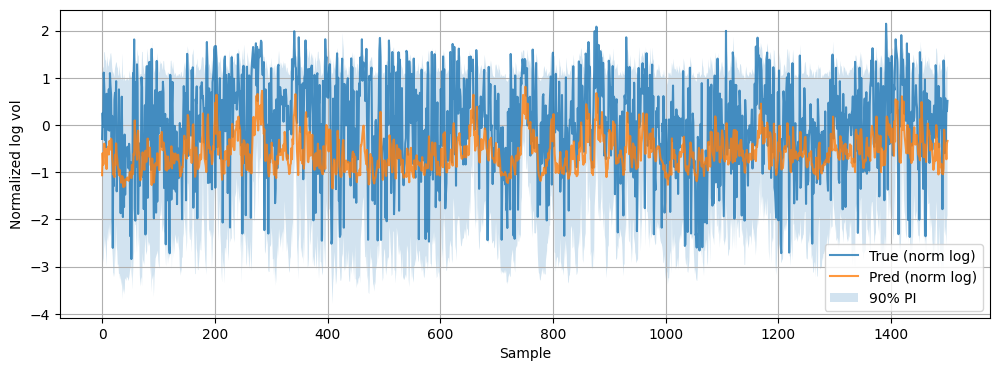

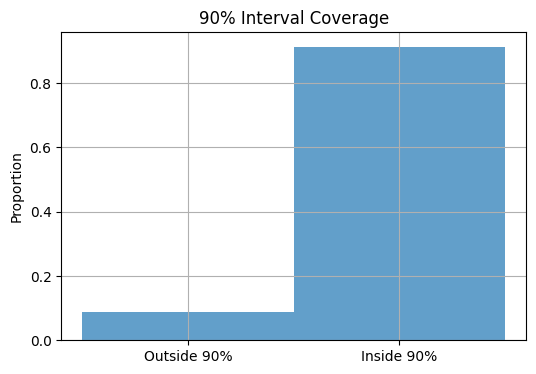

In [40]:
import numpy as np
import torch
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import properscoring as ps
import matplotlib.pyplot as plt

# --- initialize accumulators ---
y_trues = []
y_preds = []
p_nonzeros = []
lower_intervals = []
upper_intervals = []
log_likelihoods = []
vars_list = []

# --- evaluation loop ---
model.eval()
with torch.no_grad():
    for trx_batch, lob_batch, y in test_loader:
        trx_b = trx_batch.permute(0,2,1)
        lob_b = lob_batch.permute(0,2,1)

        p_nonzero, mean, var, alpha, threshold, prob = model(trx_b, lob_b)

        # Expected log-volume
        pred_log = p_nonzero.squeeze() * (mean * prob).sum(dim=1)
        
        # 90% pred-interval
        std = var.sqrt()
        z = norm.ppf(0.95)
        base = (mean * prob).sum(dim=1)
        lower = base - z * (std * prob).sum(dim=1)
        upper = base + z * (std * prob).sum(dim=1)

        # log-likelihood
        lnp = LNP(mean, std, alpha, threshold)
        ll   = lnp.log_pdf(y.unsqueeze(1))
        mix_ll = torch.sum(ll * prob, dim=1)
        ll_total = p_nonzero.squeeze() * mix_ll + (1 - p_nonzero.squeeze()) * (y <= -5.0).float()

        # collect
        y_trues.append(y.cpu().numpy())
        y_preds.append(pred_log.cpu().numpy())
        p_nonzeros.append(p_nonzero.cpu().numpy())
        lower_intervals.append(lower.cpu().numpy())
        upper_intervals.append(upper.cpu().numpy())
        log_likelihoods.append(ll_total.cpu().numpy())
        vars_list.append(var.cpu().numpy())

# --- stack / concat ---
y_true = np.concatenate(y_trues)
y_pred = np.concatenate(y_preds)
#cut first 500 observation
p_nonzero = np.concatenate(p_nonzeros)
lower = np.concatenate(lower_intervals)
upper = np.concatenate(upper_intervals)
log_likelihoods = np.concatenate(log_likelihoods)
var = np.concatenate(vars_list, axis=0)

print(f"y_true shape: {y_true.shape}, y_pred shape: {y_pred.shape}, var shape: {var.shape}")

# --- metrics ---
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
nll  = -np.mean(log_likelihoods)
crps = np.mean([
    ps.crps_gaussian(y_true[i], mu=y_pred[i], sig=np.sqrt(var[i].mean()))
    for i in range(len(y_true))
])
coverage = np.mean((y_true >= lower) & (y_true <= upper))

# de-normalize & MAPE
y_true_exp = np.exp(y_true * test_ds.y_std + test_ds.y_mean)
y_pred_exp = np.exp(y_pred * test_ds.y_std + test_ds.y_mean)
mape = np.mean(np.abs((y_true_exp - y_pred_exp) / y_true_exp)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"NLL:  {nll:.4f}")
print(f"CRPS: {crps:.4f}")
print(f"90% coverage: {coverage:.4f}")
print(f"MAPE: {mape:.2f}%")

# --- plots ---
plt.figure(figsize=(12,4))
plt.plot(y_true, label='True (norm log)', alpha=0.8)
plt.plot(y_pred, label='Pred (norm log)', alpha=0.8)
plt.fill_between(np.arange(len(y_true)), lower, upper, alpha=0.2, label='90% PI')
plt.legend(); plt.xlabel('Sample'); plt.ylabel('Normalized log vol'); plt.grid(True)

plt.figure(figsize=(6,4))
inside = ((y_true >= lower) & (y_true <= upper)).astype(int)
plt.hist(inside, bins=[0,1,2], density=True, alpha=0.7)
plt.xticks([0.5,1.5], ['Outside 90%','Inside 90%'])
plt.ylabel('Proportion'); plt.title('90% Interval Coverage'); plt.grid(True)

plt.show()


In [41]:
# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
metrics = {
    'MSE': mean_squared_error(y_true_exp, y_pred_exp),
    'RMSE': np.sqrt(mean_squared_error(y_true_exp, y_pred_exp)),
    'MAE': mean_absolute_error(y_true_exp, y_pred_exp),
    'MAPE': np.mean(np.abs((y_true_exp - y_pred_exp) / (y_true_exp + 1e-8))) * 100,  # Adding small epsilon to avoid division by zero
    'R²': r2_score(y_true_exp, y_pred_exp),
    'Median Absolute Error': np.median(np.abs(y_true_exp - y_pred_exp)),
    'Mean Absolute Scaled Error (MASE)': np.mean(np.abs(y_true_exp - y_pred_exp)) / np.mean(np.abs(y_true_exp[1:] - y_true_exp[:-1])),
}

# Print metrics with explanations
print("Model Performance Metrics:")
print("="*40)
for metric, value in metrics.items():
    print(f"{metric:25}: {value:.4f}")

Model Performance Metrics:
MSE                      : 1.0226
RMSE                     : 1.0112
MAE                      : 0.6604
MAPE                     : 85.7448
R²                       : -0.3547
Median Absolute Error    : 0.3497
Mean Absolute Scaled Error (MASE): 0.9554


In [42]:
# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
metrics = {
    'MSE': mean_squared_error(y_true_exp,np.repeat(np.mean(y_pred_exp), len(y_true_exp))),
    'RMSE': np.sqrt(mean_squared_error(y_true_exp, np.repeat(np.mean(y_pred_exp), len(y_true_exp)))),
    'MAE': mean_absolute_error(y_true_exp, np.repeat(np.mean(y_pred_exp), len(y_true_exp))),
    'MAPE': np.mean(np.abs((y_true_exp - np.repeat(np.mean(y_pred_exp), len(y_true_exp))) / (y_true_exp + 1e-8))) * 100,  # Adding small epsilon to avoid division by zero
    'R²': r2_score(y_true_exp, np.repeat(np.mean(y_pred_exp), len(y_true_exp))),
    'Median Absolute Error': np.median(np.abs(y_true_exp - np.repeat(np.mean(y_pred_exp), len(y_true_exp)))),
    'Mean Absolute Scaled Error (MASE)': np.mean(np.abs(y_true_exp - np.repeat(np.mean(y_pred_exp), len(y_true_exp)))) / np.mean(np.abs(y_true_exp[1:] - y_true_exp[:-1])),
}

# Print metrics with explanations
print("Model Performance Metrics:")
print("="*40)
for metric, value in metrics.items():
    print(f"{metric:25}: {value:.4f}")

Model Performance Metrics:
MSE                      : 1.0957
RMSE                     : 1.0468
MAE                      : 0.6744
MAPE                     : 93.4864
R²                       : -0.4515
Median Absolute Error    : 0.2973
Mean Absolute Scaled Error (MASE): 0.9755


In [43]:
const = np.repeat(y_true_exp.mean(), len(y_true_exp))

metrics = {
    'MSE': mean_squared_error(y_true_exp, const),
    'RMSE': np.sqrt(mean_squared_error(y_true_exp, const)),
    'MAE': mean_absolute_error(y_true_exp, const),
    'MAPE': np.mean(np.abs((y_true_exp - const) / (y_true_exp + 1e-8))) * 100,
    'R²': r2_score(y_true_exp, const),
    'Median Absolute Error': np.median(np.abs(y_true_exp - const)),
    'Mean Absolute Scaled Error (MASE)': (
        np.mean(np.abs(y_true_exp - const)) /
        np.mean(np.abs(y_true_exp[1:] - y_true_exp[:-1]))
    ),
}

print("Model Performance Metrics (constant = mean of y_true):")
print("="*40)
for k,v in metrics.items():
    print(f"{k:25}: {v:.4f}")


Model Performance Metrics (constant = mean of y_true):
MSE                      : 0.7548
RMSE                     : 0.8688
MAE                      : 0.6626
MAPE                     : 231.3719
R²                       : 0.0000
Median Absolute Error    : 0.5697
Mean Absolute Scaled Error (MASE): 0.9584


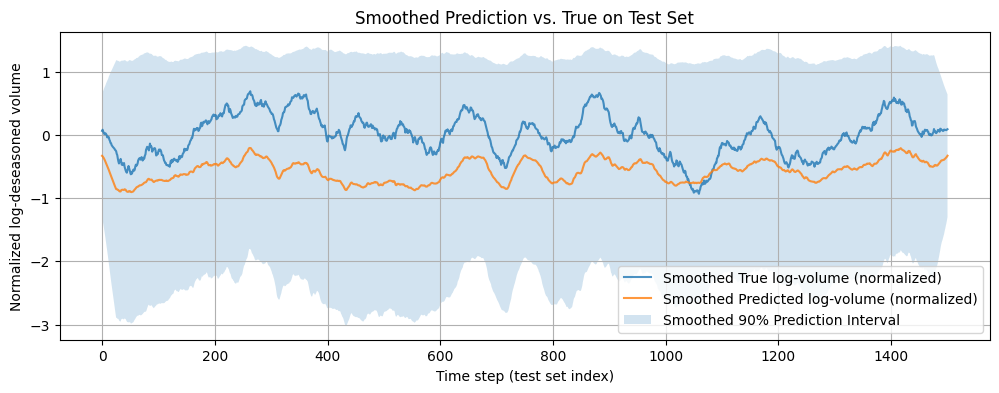

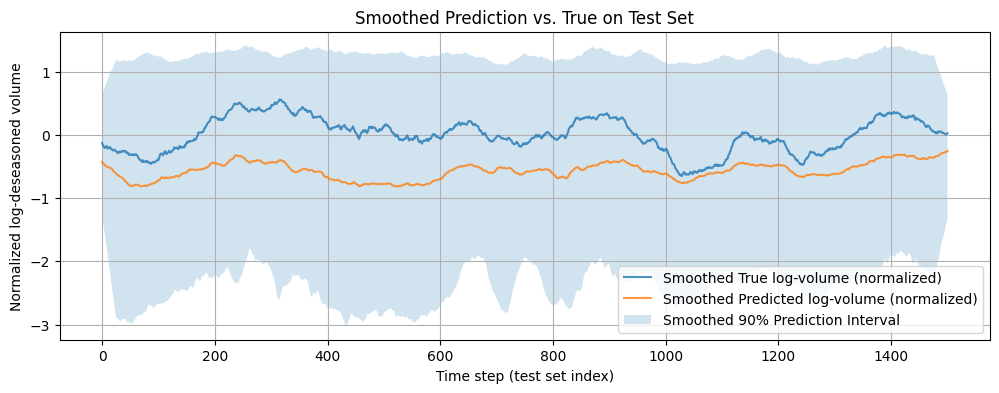

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Smoothing function: Moving Average
def moving_average(x, window_size=50):
    return np.convolve(x, np.ones(window_size)/window_size, mode='same')



# Apply smoothing
y_true_smooth = moving_average(y_true)
y_pred_smooth = moving_average(y_pred)
lower_smooth = moving_average(lower)
upper_smooth = moving_average(upper)

# Plot smoothed prediction vs. true
plt.figure(figsize=(12, 4))
plt.plot(y_true_smooth, label='Smoothed True log-volume (normalized)', alpha=0.8)
plt.plot(y_pred_smooth, label='Smoothed Predicted log-volume (normalized)', alpha=0.8)
plt.fill_between(range(len(y_true)), lower_smooth, upper_smooth, alpha=0.2, label='Smoothed 90% Prediction Interval')
plt.xlabel('Time step (test set index)')
plt.ylabel('Normalized log-deseasoned volume')
plt.title('Smoothed Prediction vs. True on Test Set')
plt.legend()
plt.grid(True)


# Apply smoothing
y_true_smooth = moving_average(y_true, window_size=100)
y_pred_smooth = moving_average(y_pred, window_size=100)
lower_smooth = moving_average(lower)
upper_smooth = moving_average(upper)


# Plot smoothed prediction vs. true
plt.figure(figsize=(12, 4))
plt.plot(y_true_smooth, label='Smoothed True log-volume (normalized)', alpha=0.8)
plt.plot(y_pred_smooth, label='Smoothed Predicted log-volume (normalized)', alpha=0.8)
plt.fill_between(range(len(y_true)), lower_smooth, upper_smooth, alpha=0.2, label='Smoothed 90% Prediction Interval')
plt.xlabel('Time step (test set index)')
plt.ylabel('Normalized log-deseasoned volume')
plt.title('Smoothed Prediction vs. True on Test Set')
plt.legend()
plt.grid(True)


plt.show()
